## Домашная работа №2

В этом домашнем задании вам необходимо будет решить задачу регрессии (предсказание `humidity` - влажности на основании других погодных характеристик). Данные находятся в файле `data.csv`. При выполнении задания вам нужно проделать следующие шаги:


### EDA (5 баллов)
1) Заполните пропуски в данных (объясните, почему тот или иной способ пропуска наилучший) (*1 балл*)

2) Визуализируйте распределения признаков, сделайте вывод о том, какие признаки являются категориальными, какие числовыми, какие признаки логически связаны между собой (*1 балл*)

3) Очистите выборку от выбросов, поясните, почему эти объекты вы посчитали выбросами (*1 балл*)

4) Рассмотрите матрицу корреляций, удалите высоко скорелированные между собой признаки (если считаете, что этого делать не нужно, то напишите почему), объясните свой выбор (*1 балл*)

5) Визуализируйте данные алгоритмом TSNE, сделайте выводы о разделимости данных и выполнении гипотезы компактности. Попробуйте настроить гиперпараметры алгоритма так, чтобы разделимость была наилучшей (*1 балл*)

### Feature Engineering (5+ баллов)
1) Обработайте все категориальные признаки, используя `Target` / `One-hot` / `label` / `feature encoding` (реализуйте как минимум два разных подхода), объясните свой выбор (*2 балла*)

2) Для числовых признаков создайте новые признаки, имеющие высокую корреляцию с целевой переменной (выше, чем у начальных признаков). Сделайте не менее 5 новых признаков, за очень крутые результаты в этом пункте можно получить дополнительные баллы (*2+ балла*)

3) Сделайте бинарные признаки-индикаторы на основе числовых признаков (признак-индикатор - это, например признак "значение признака x больше 10000"), объясните, почему вы считаете, что эти индикаторы могут быть полезны (*1 балл*)

### Modelling (5 баллов)
1) Предложите наилучшую схему разбиения датасета на трейн, валидацию и тест (объясните, почему так), проверьте, что распределения выборок совпадают (*1 балл*)

2) Попробуйте несколько моделей с подбором гиперпараметров (линейная регрессия, случайный лес / градиентный бустинг и еще любую на ваш выбор), сделайте вывод о том, какая модель дает наилучшее качество и почему (*1 балл*)

3) Постройте график feature importance, сделайте выводы и качестве признаков, сравните feature importance с матрицей корреляции. Посмотрите также, какие признаки зануляет `Lasso` регрессия, сравните результаты с `feature importance` (*2 балла*)

4) Отберите наилучшие признаки и обучите финальную модель, сделайте вывод: получилось ли приемлимое качество, или модель не сильно лучше случайного предсказания? (*1 балл*)

**Важно:** при выполнении этого задания не обязательно ограничиваться только этими пунктами. Вы можете проводить любые дополнительные исследования и применять различные техники, если это потребуется. В каждом пункте обязательно объясняйте результаты и свой ход мыслей при принятии различных решений. Если будет просто код, то есть большой шанс получить очень мало баллов.

**Ограничения:** в пункте `Modelling` можно использовать только те модели, которые были рассмотрены на занятиях. Подбирать гиперпараметры можно любые, не только те, что рассмотрены на занятиях. В остальных пунктам ограничений на используемые алгоритмы нет.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

In [2]:
import pandas as pd


df = pd.read_csv('data.csv')
df.head()

Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0  Partly Cloudy        rain         9.472222                  7.388889   
1  Partly Cloudy        rain         9.355556                       NaN   
2  Mostly Cloudy        rain              NaN                  9.377778   
3  Partly Cloudy        rain         8.288889                  5.944444   
4            NaN        rain         8.755556                  6.977778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89                NaN                   251.0          15.8263   
1      0.86            14.2646                   259.0          15.8263   
2      0.89             3.9284                   204.0          14.9569   
3      0.83            14.1036                   269.0          15.8263   
4      0.83            11.0446                   259.0          15.8263   

   Loud Cover  Pressure (millibars)                      Daily Summary  
0         NaN               1015.13  Partly cloudy throughout the day.  
1         NaN               1015.63  Partly cloudy throughout the day.  
2         NaN               1015.94  Partly cloudy throughout the day.  
3         NaN               1016.41  Partly cloudy throughout the day.  
4         NaN               1016.51  Partly cloudy throughout the day.

In [3]:
x = df.drop(['Humidity'], axis=1)
y = df['Humidity']

In [4]:
df.isna().sum()

Summary                     29083
Precip Type                   517
Temperature (C)             19293
Apparent Temperature (C)     9754
Humidity                        0
Wind Speed (km/h)            4835
Wind Bearing (degrees)          0
Visibility (km)                 0
Loud Cover                  77103
Pressure (millibars)            0
Daily Summary                   0
dtype: int64

In [5]:
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [6]:
len(df['Summary'].unique())

27

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\1702224796.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col])


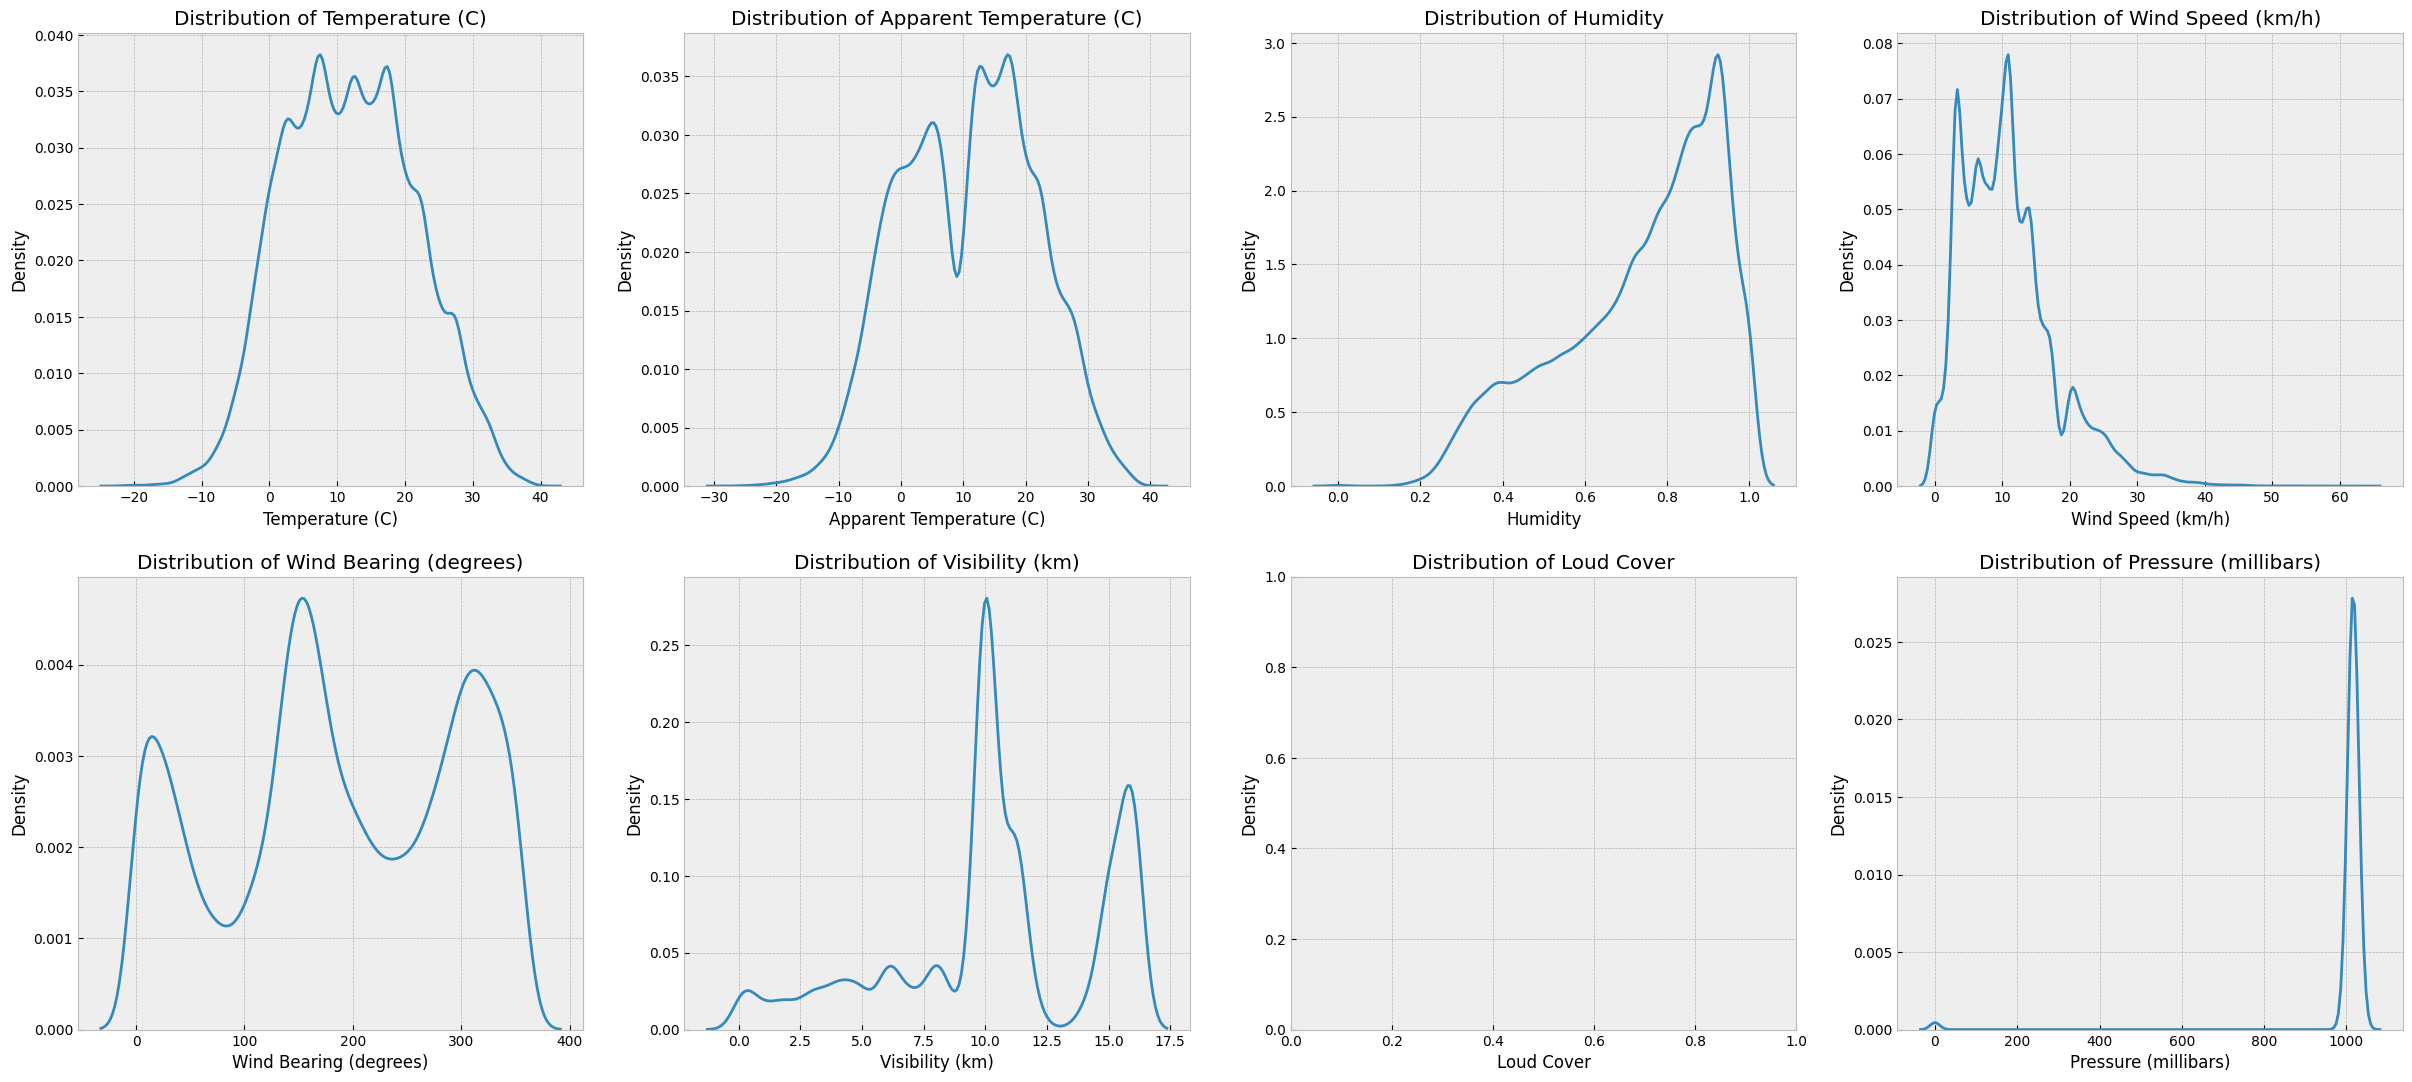

In [7]:
plt.figure(figsize=(30, 20))
plt.style.use('bmh')

num = 0
for col in df.columns:
    
    if df[col].dtype == 'object':
        continue
    num += 1
    plt.subplot(3, 4, num)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(df[col])

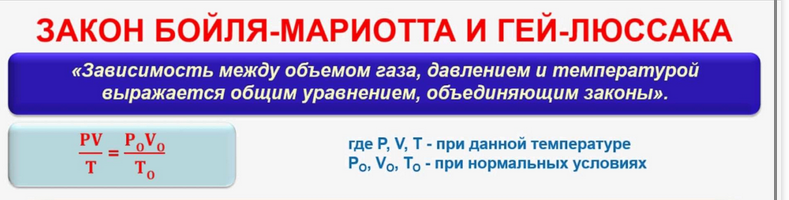

короче какая мысль появилась, влажность зависит от давления (физика), я бы добавил переменную давление/температура

температуре ставить ощущаюемую температуру, summary связать с daily summary

In [8]:
for el in df["Daily Summary"].unique():
    val =  df[df["Daily Summary"] == el]["Summary"].mode().iloc[0]
    df.loc[df["Daily Summary"] == el, "Summary"] = df[df["Daily Summary"] == el]["Summary"].fillna(val)
    

In [ ]:
df.isna().sum()

хочу удалить ячейки где температура и ощущаемая температура не заданы, потому что без этих данных не получится восстановить влажность

In [9]:
df = df.drop(df[df["Temperature (C)"].isna() & df["Apparent Temperature (C)"].isna()].index)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\1702224796.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col])


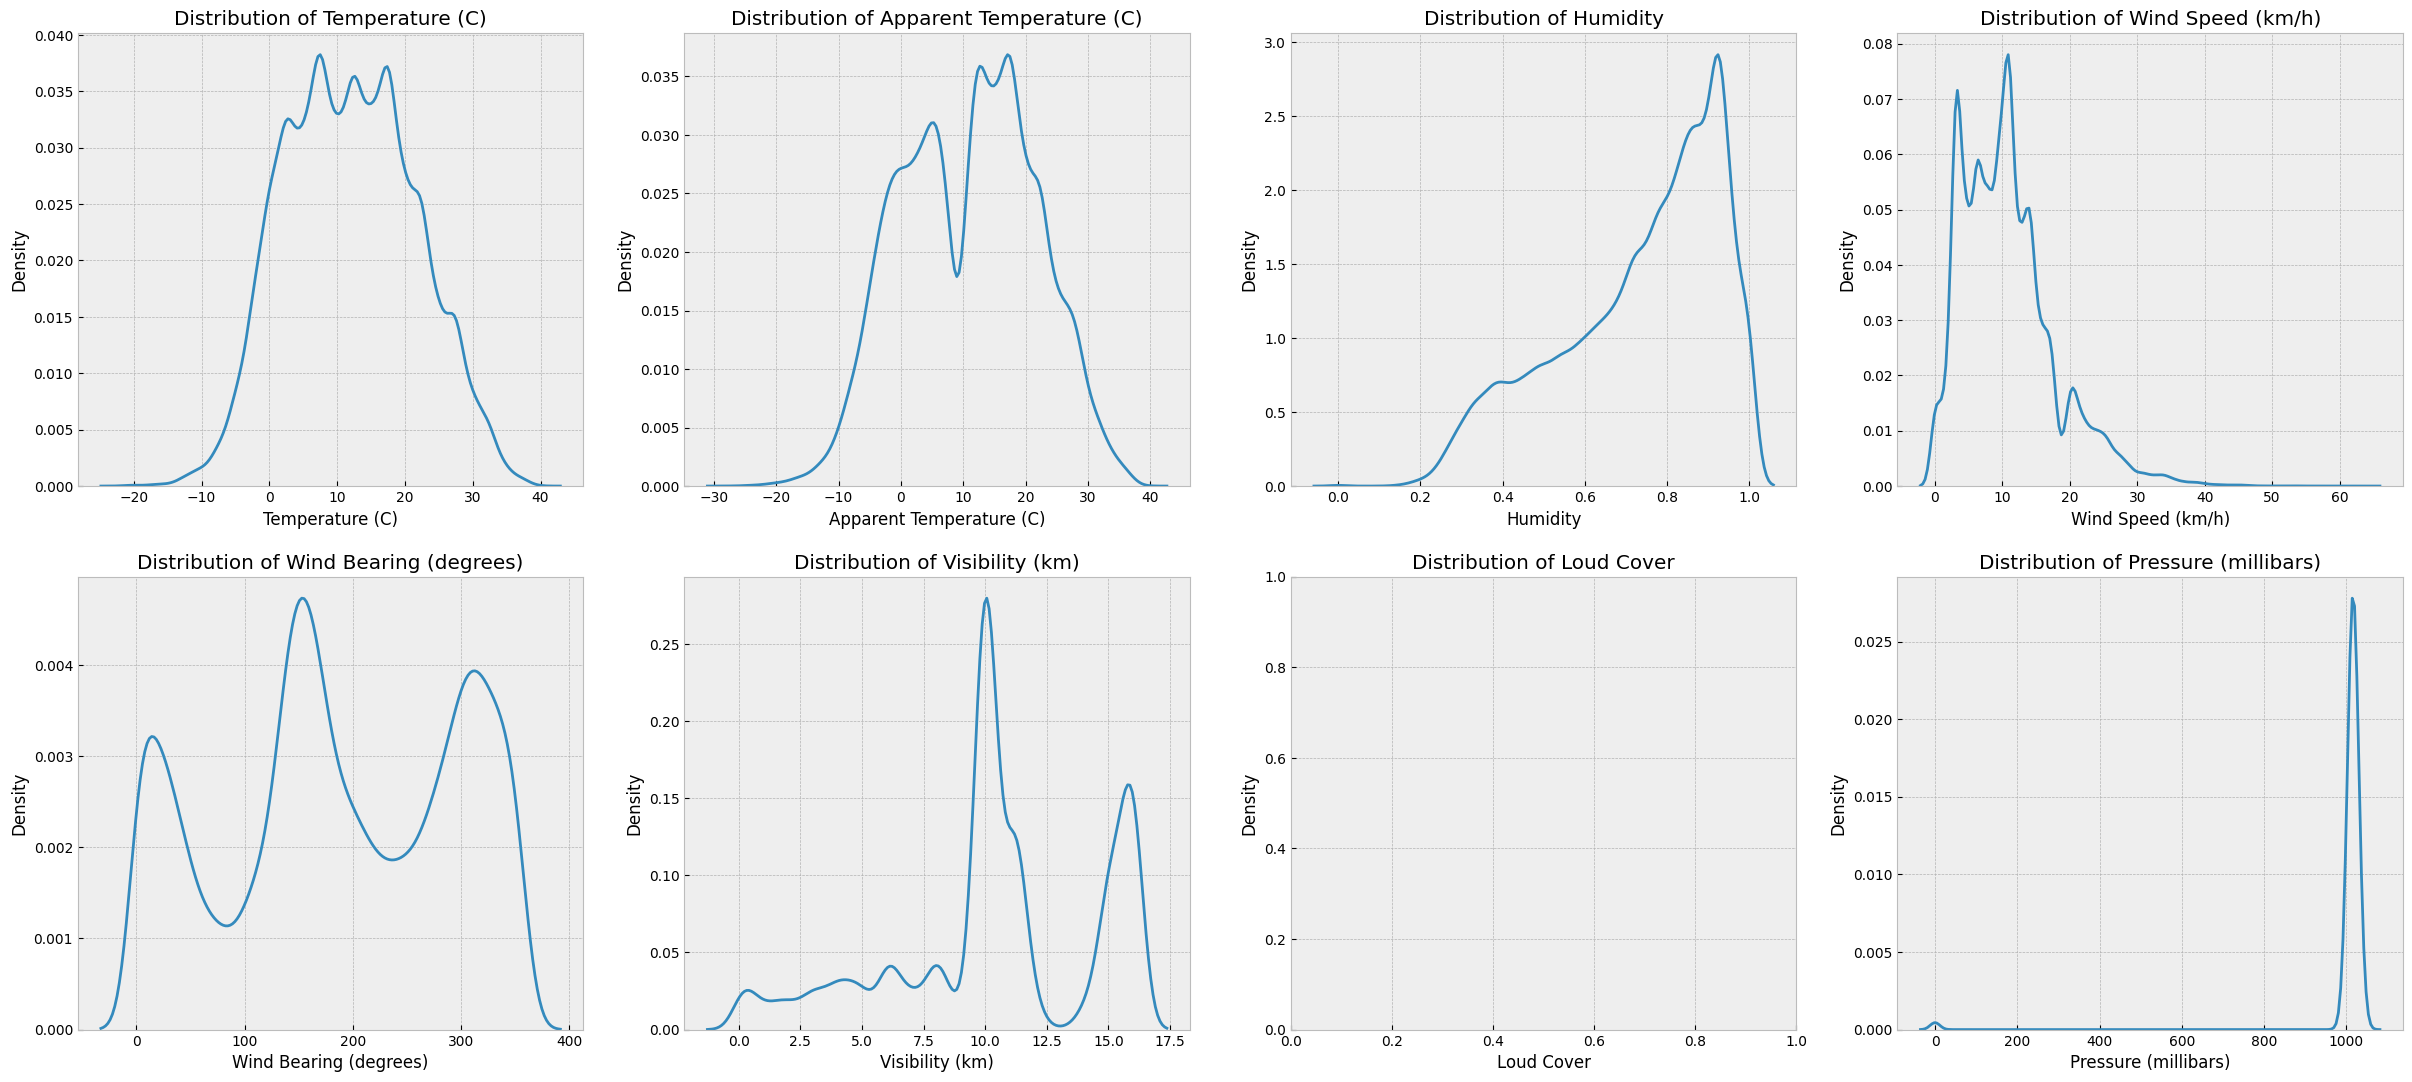

In [10]:
plt.figure(figsize=(30, 20))
plt.style.use('bmh')

num = 0
for col in df.columns:
    
    if df[col].dtype == 'object':
        continue
    num += 1
    plt.subplot(3, 4, num)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(df[col])

In [11]:
print('Num of numeric feats:', num)
print('Num of categorical feats:', len(df.columns) - num)

Num of numeric feats: 8
Num of categorical feats: 3


распределения видимо не поменялись, значит пока все сделано правильно

loud cover тоже все наны, поэтому удалю-ка я этот столбец, тем более я даже не знаю что это такое..

In [12]:
df = df.drop("Loud Cover", axis=1)

In [13]:
df

Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0      Partly Cloudy        rain         9.472222                  7.388889   
1      Partly Cloudy        rain         9.355556                       NaN   
2      Mostly Cloudy        rain              NaN                  9.377778   
3      Partly Cloudy        rain         8.288889                  5.944444   
4      Partly Cloudy        rain         8.755556                  6.977778   
...              ...         ...              ...                       ...   
96448  Partly Cloudy        rain        26.016667                 26.016667   
96449  Partly Cloudy        rain        24.583333                 24.583333   
96450  Partly Cloudy        rain        22.038889                 22.038889   
96451  Partly Cloudy        rain        21.522222                 21.522222   
96452  Partly Cloudy        rain        20.438889                 20.438889   

       Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0          0.89                NaN                   251.0          15.8263   
1          0.86            14.2646                   259.0          15.8263   
2          0.89             3.9284                   204.0          14.9569   
3          0.83            14.1036                   269.0          15.8263   
4          0.83            11.0446                   259.0          15.8263   
...         ...                ...                     ...              ...   
96448      0.43            10.9963                    31.0          16.1000   
96449      0.48            10.0947                    20.0          15.5526   
96450      0.56             8.9838                    30.0          16.1000   
96451      0.60            10.5294                    20.0          16.1000   
96452      0.61             5.8765                    39.0          15.5204   

       Pressure (millibars)                           Daily Summary  
0                   1015.13       Partly cloudy throughout the day.  
1                   1015.63       Partly cloudy throughout the day.  
2                   1015.94       Partly cloudy throughout the day.  
3                   1016.41       Partly cloudy throughout the day.  
4                   1016.51       Partly cloudy throughout the day.  
...                     ...                                     ...  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.  

[94503 rows x 10 columns]

In [14]:
df.isna().sum()

Summary                         0
Precip Type                   506
Temperature (C)             17343
Apparent Temperature (C)     7804
Humidity                        0
Wind Speed (km/h)            4749
Wind Bearing (degrees)          0
Visibility (km)                 0
Pressure (millibars)            0
Daily Summary                   0
dtype: int64

In [15]:
new_df = df.dropna(subset=["Precip Type", "Temperature (C)"])

In [16]:
new_df.isna().sum()

Summary                        0
Precip Type                    0
Temperature (C)                0
Apparent Temperature (C)    7747
Humidity                       0
Wind Speed (km/h)           3840
Wind Bearing (degrees)         0
Visibility (km)                0
Pressure (millibars)           0
Daily Summary                  0
dtype: int64

In [17]:
len(new_df.loc[(new_df["Precip Type"] == "snow") & (new_df["Temperature (C)"] <= 0)])

8570

In [18]:
len(new_df.loc[(new_df["Precip Type"] == "rain") & (new_df["Temperature (C)"] >= 0)])

68176

In [19]:
len(new_df) - len(new_df.loc[(new_df["Precip Type"] == "rain") & (new_df["Temperature (C)"] >= 0)]) - len(new_df.loc[(new_df["Precip Type"] == "snow") & (new_df["Temperature (C)"] <= 0)])

0

и тут я понял, что когда температура меньше либо равна нулю, идет снег. А если температура больше нуля, то это дождь. Я, конечно , могу заменить все значения по этому принципу, но зачем нужен этот индикатор... если есть нормальный параметр температуры, который говорит больше

In [20]:
df.loc[(df["Temperature (C)"] <= 0)].loc[df["Precip Type"].isna()]["Precip Type"] = "snow"

In [21]:
df["Precip Type"].fillna("rain", inplace = True)

In [ ]:
df.isna().sum()

In [22]:
new_df = df.dropna(subset=["Temperature (C)", "Apparent Temperature (C)"])

In [23]:
new_df["Temperature (C)"].astype("float64")

0         9.472222
3         8.288889
4         8.755556
6         7.733333
9        13.772222
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 69356, dtype: float64

In [24]:
new_df["Apparent Temperature (C)"].astype("float64")

0         7.388889
3         5.944444
4         6.977778
6         5.522222
9        13.772222
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Apparent Temperature (C), Length: 69356, dtype: float64

In [25]:
a = new_df["Temperature (C)"] - new_df["Apparent Temperature (C)"]

In [26]:
len(a[a<0])

2040

In [27]:
len(a[a==0])

40029

думается, что температура и ощущаемая температура связаны скоростью ветра

In [28]:
new_df[new_df["Temperature (C)"] == new_df["Apparent Temperature (C)"]].median()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\263172470.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df[new_df["Temperature (C)"] == new_df["Apparent Temperature (C)"]].median()


Temperature (C)               15.883333
Apparent Temperature (C)      15.883333
Humidity                       0.750000
Wind Speed (km/h)              7.969500
Wind Bearing (degrees)       185.000000
Visibility (km)               10.352300
Pressure (millibars)        1016.070000
dtype: float64

In [29]:
new_df[new_df["Temperature (C)"] != new_df["Apparent Temperature (C)"]].median()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2485300334.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df[new_df["Temperature (C)"] != new_df["Apparent Temperature (C)"]].median()


Temperature (C)                5.144444
Apparent Temperature (C)       2.594444
Humidity                       0.820000
Wind Speed (km/h)             11.205600
Wind Bearing (degrees)       175.000000
Visibility (km)                9.982000
Pressure (millibars)        1017.130000
dtype: float64

<AxesSubplot: xlabel='Wind Speed (km/h)', ylabel='Density'>

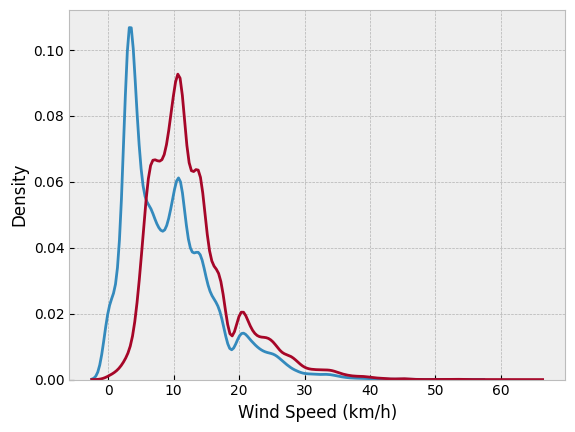

In [30]:
sns.kdeplot(new_df[new_df["Temperature (C)"] == new_df["Apparent Temperature (C)"]]["Wind Speed (km/h)"])
sns.kdeplot(new_df[new_df["Temperature (C)"] != new_df["Apparent Temperature (C)"]]["Wind Speed (km/h)"])

In [31]:
new_df[new_df["Temperature (C)"] > new_df["Apparent Temperature (C)"]].mean()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\755824347.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df[new_df["Temperature (C)"] > new_df["Apparent Temperature (C)"]].mean()


Temperature (C)                6.334253
Apparent Temperature (C)       3.529229
Humidity                       0.771150
Wind Speed (km/h)             13.006436
Wind Bearing (degrees)       186.406824
Visibility (km)                9.330738
Pressure (millibars)        1000.891318
dtype: float64

In [32]:
new_df[new_df["Temperature (C)"] < new_df["Apparent Temperature (C)"]].mean()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\1478176445.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df[new_df["Temperature (C)"] < new_df["Apparent Temperature (C)"]].mean()


Temperature (C)               29.441966
Apparent Temperature (C)      30.271762
Humidity                       0.489083
Wind Speed (km/h)             10.235305
Wind Bearing (degrees)       184.065686
Visibility (km)               11.660709
Pressure (millibars)        1003.345882
dtype: float64

<AxesSubplot: xlabel='Wind Speed (km/h)', ylabel='Density'>

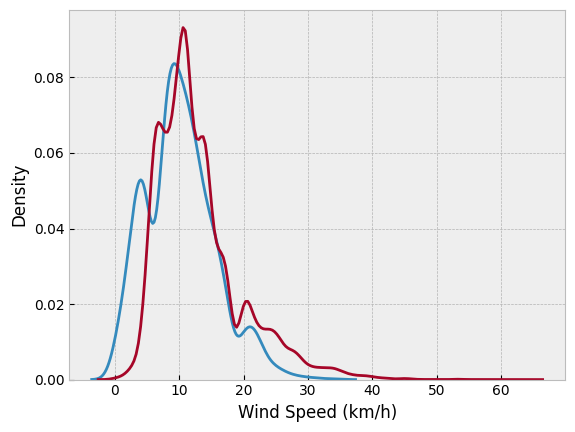

In [33]:
sns.kdeplot(new_df[new_df["Temperature (C)"] < new_df["Apparent Temperature (C)"]]["Wind Speed (km/h)"])
sns.kdeplot(new_df[new_df["Temperature (C)"] > new_df["Apparent Temperature (C)"]]["Wind Speed (km/h)"])

<AxesSubplot: xlabel='Apparent Temperature (C)', ylabel='Density'>

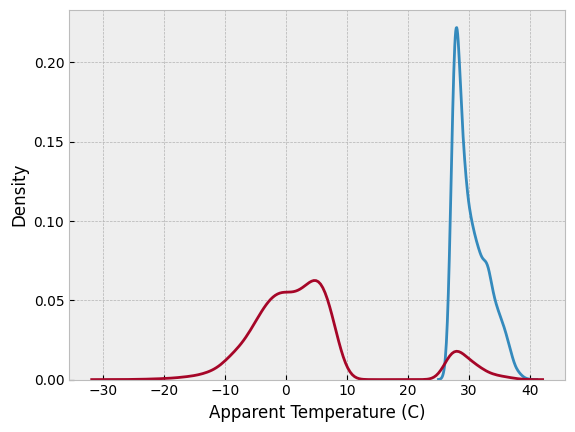

In [34]:
sns.kdeplot(new_df[new_df["Temperature (C)"] < new_df["Apparent Temperature (C)"]]["Apparent Temperature (C)"], label = "edwdwd", legend = True)
sns.kdeplot(new_df[new_df["Temperature (C)"] > new_df["Apparent Temperature (C)"]]["Apparent Temperature (C)"], label = "t > at", legend = True)

хочу, чтобы при скорости ветра меньше 7 км/ч температура = ощущаемой, при ощущаемой температуре >= 26 и бОльшем ветре температур у брать как ощущаемую - средний % отклонения

In [ ]:
df.isna().sum()

In [ ]:
df.isna().sum()

In [36]:
df['Temperature (C)'].describe()

count    77160.000000
mean        11.904922
std          9.553521
min        -21.822222
25%          4.637500
50%         11.922222
75%         18.816667
max         39.905556
Name: Temperature (C), dtype: float64

In [37]:
indx = df.loc[(df["Temperature (C)"].isna()) & (df["Wind Speed (km/h)"] <= 7)].index

In [38]:

a = df.loc[indx]["Apparent Temperature (C)"].tolist()

df.loc[indx, "Temperature (C)"] = a

In [39]:
indx = df.loc[( df["Temperature (C)"].notnull()) & (df["Apparent Temperature (C)"] >= 26)].index
b = ((df.loc[indx]["Temperature (C)"] - df.loc[indx]["Apparent Temperature (C)"])).median()
indx_1 = df.loc[( df["Temperature (C)"].isna()) & (df["Apparent Temperature (C)"] >= 26)].index

a = df.loc[indx_1]["Apparent Temperature (C)"].tolist() - b 

df.loc[indx_1, "Temperature (C)"] = a


In [40]:
indx = df.loc[( df["Temperature (C)"].notnull()) & (df["Apparent Temperature (C)"] <= 26)].index
b = ((df.loc[indx]["Temperature (C)"] - df.loc[indx]["Apparent Temperature (C)"])).median()
indx_1 = df.loc[( df["Temperature (C)"].isna()) & (df["Apparent Temperature (C)"] <= 26)].index

a = df.loc[indx_1]["Apparent Temperature (C)"].tolist() - b 

df.loc[indx_1, "Temperature (C)"] = a


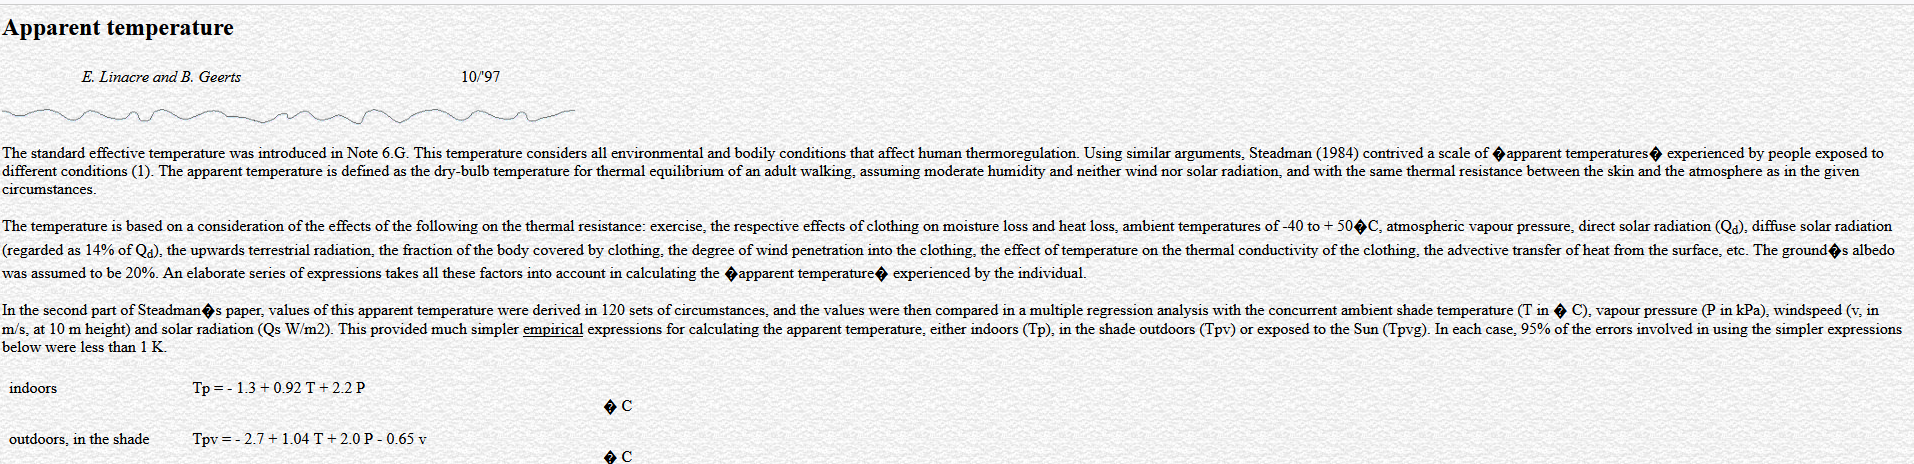

In [41]:
a = df[df["Wind Speed (km/h)"].notnull()]["Wind Speed (km/h)"].mean() 

df.loc[df["Apparent Temperature (C)"].isna() & df["Wind Speed (km/h)"].isna(), "Wind Speed (km/h)"] = a

In [42]:
indx_1 = df.loc[df["Apparent Temperature (C)"].isna()].index

a = (-2.7 - 0.65*np.float_(df.loc[indx_1]["Wind Speed (km/h)"].tolist())/3.6 + 
    1.04*df.loc[indx_1]["Temperature (C)"] + 0.005 * df.loc[indx_1]["Pressure (millibars)"] )

df.loc[indx_1, "Apparent Temperature (C)"] = a

In [43]:
a = (-2.7 - 0.65*np.float_(df.loc[indx_1]["Wind Speed (km/h)"].tolist())/3.6 + 
    1.04*df.loc[indx_1]["Temperature (C)"] + 0.005 * df.loc[indx_1]["Pressure (millibars)"] )
df.loc[indx_1, "Apparent Temperature (C)"] = a

array([14.2646, 13.9587, 17.0982, ...,  4.7012, 15.617 , 13.8943])

In [46]:
indx_1 = df.loc[df["Wind Speed (km/h)"].isna()].index

a = - df.loc[indx_1]["Apparent Temperature (C)"] - 2.7 + 1.04*df.loc[indx_1]["Temperature (C)"] + 0.005*df.loc[indx_1]["Pressure (millibars)"]

df.loc[indx_1, "Wind Speed (km/h)"] = a

In [47]:
df.isna().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

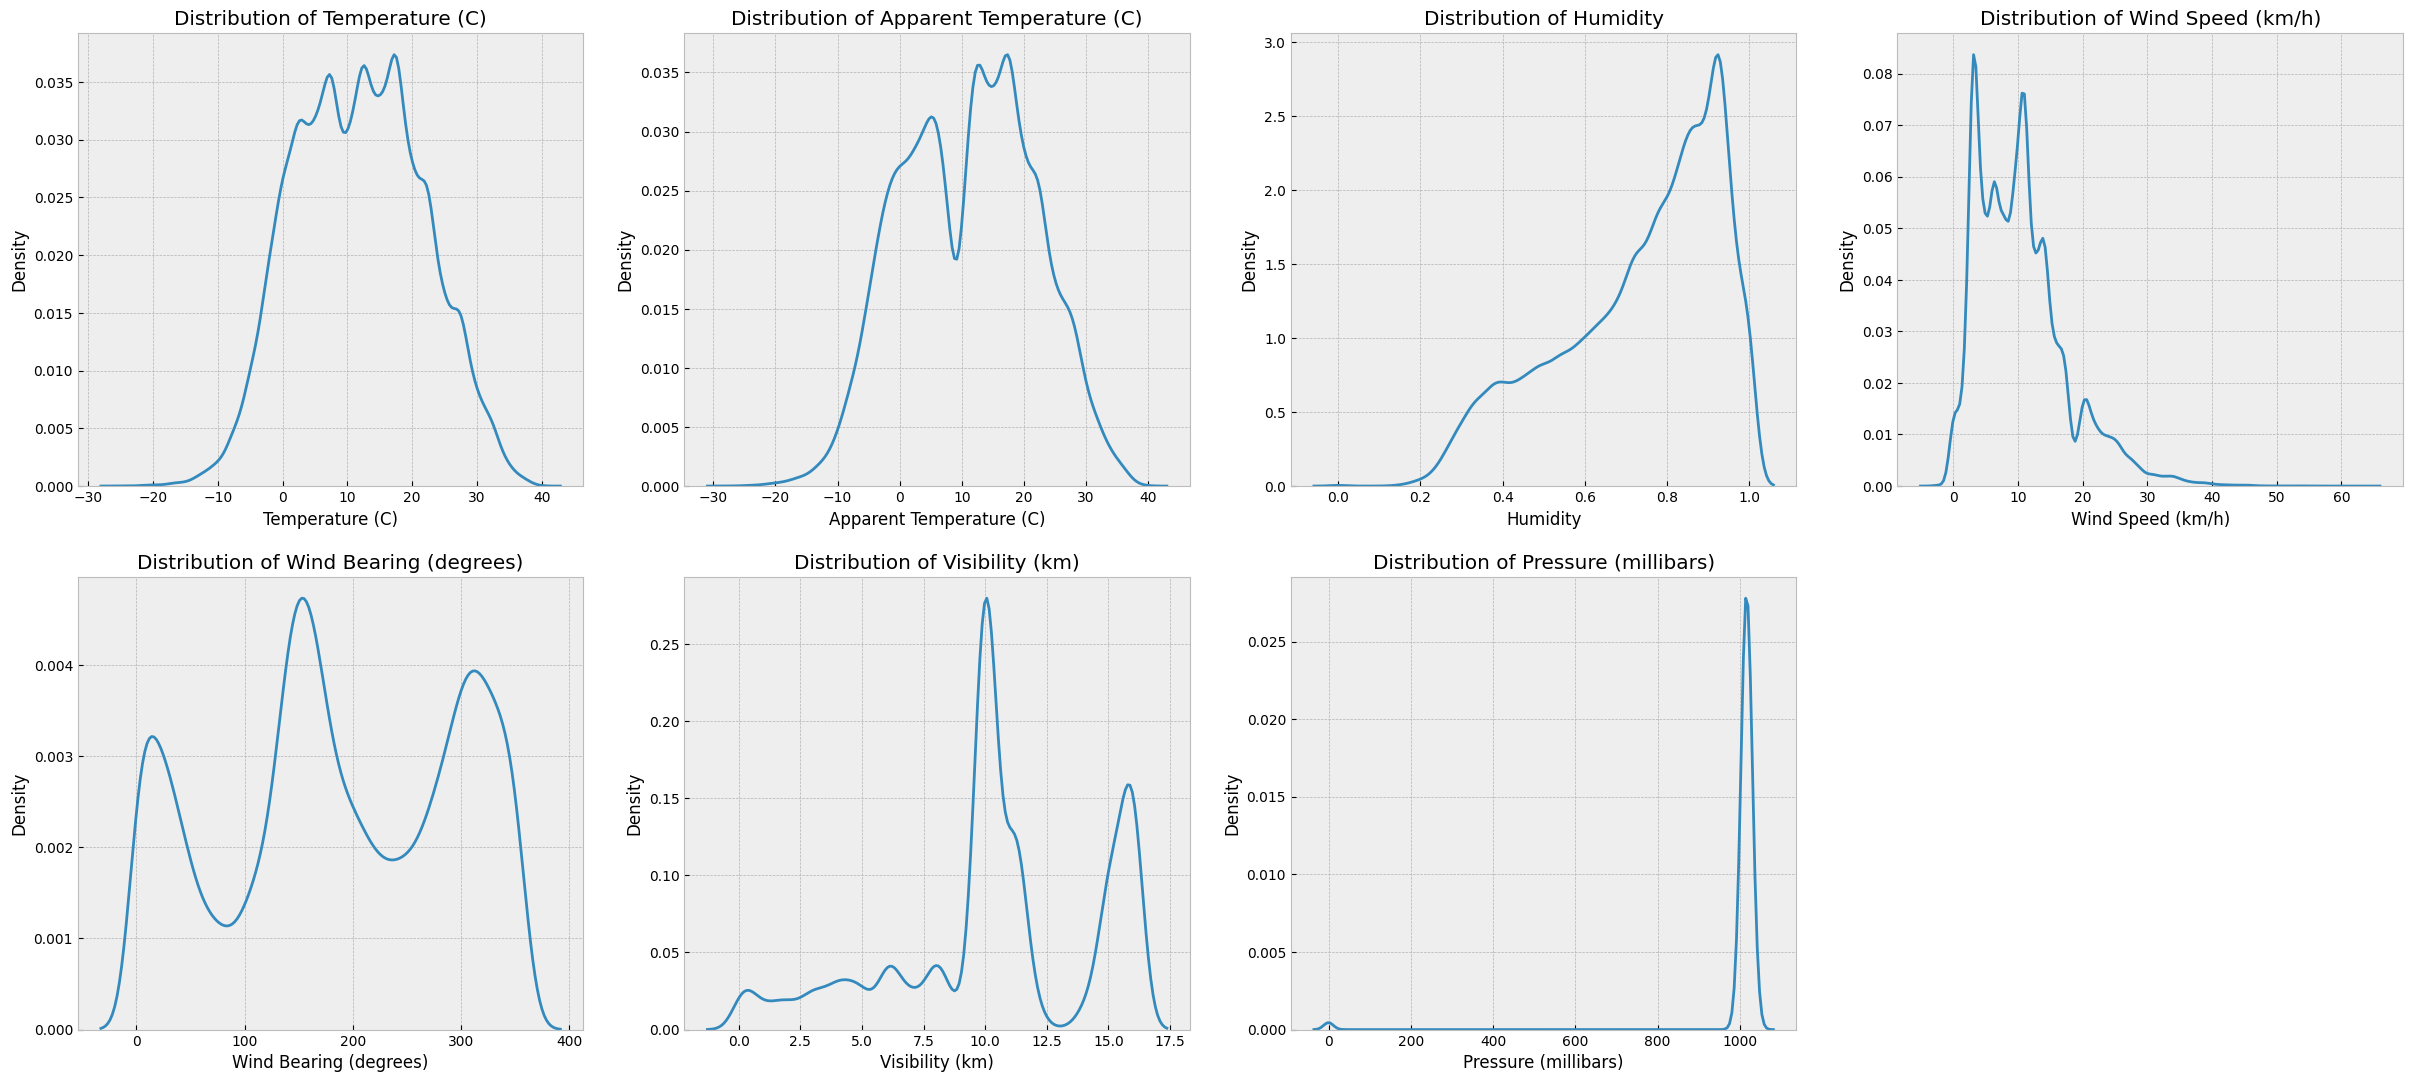

In [48]:
plt.figure(figsize=(30, 20))
plt.style.use('bmh')

num = 0
for col in df.columns:
    
    if df[col].dtype == 'object':
        continue
    num += 1
    plt.subplot(3, 4, num)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(df[col])

In [49]:
df.min()

Summary                                                        Breezy
Precip Type                                                      rain
Temperature (C)                                            -25.072222
Apparent Temperature (C)                                   -27.716667
Humidity                                                          0.0
Wind Speed (km/h)                                           -2.960444
Wind Bearing (degrees)                                            0.0
Visibility (km)                                                   0.0
Pressure (millibars)                                              0.0
Daily Summary               Breezy and foggy starting in the evening.
dtype: object

удалять выбросы буду с помощью квантилей уровня 0.1, пишут, что это одно из самых лучших


In [51]:
new_df = df
q_u = []
q_b = []
for col in df.columns:
    if df[col].dtype == 'object':
        continue
    q_u.append(df[col].quantile(q=0.01))
    q_b.append(df[col].quantile(q=0.99))

In [52]:
flux = 0
for ind, col in enumerate(df.columns):
    if df[col].dtype == 'object':
        flux+=1
        continue
    print(q_u[ind-flux])    
    df = df.drop(df[(df[col] < q_u[ind-flux]) | (df[col] > q_b[ind-flux])].index)

-8.688666666666668
-11.172222222222222
0.27
0.0
0.0
0.161
0.0


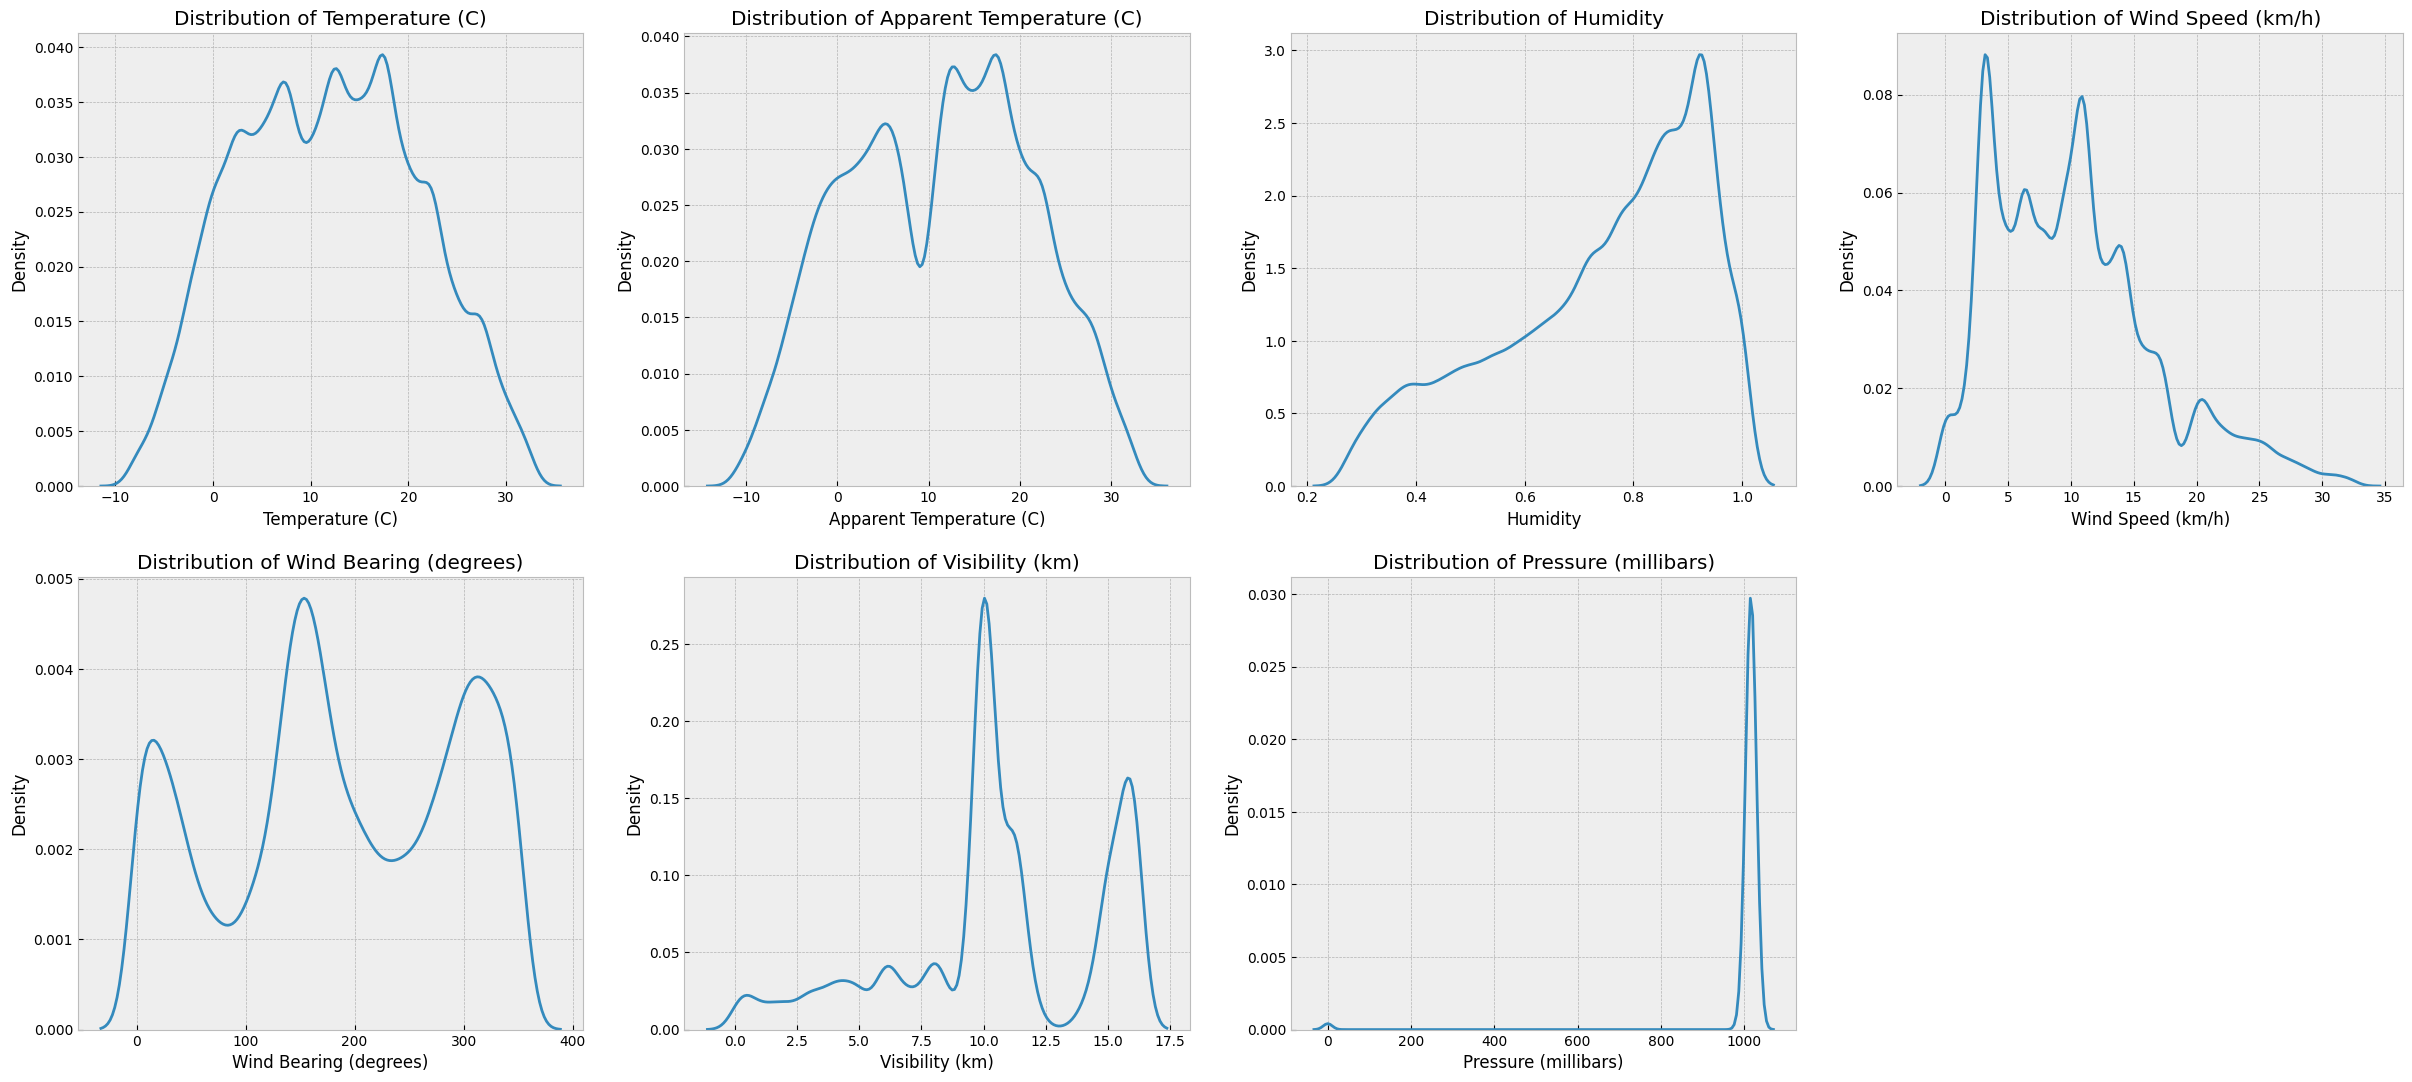

In [53]:
plt.figure(figsize=(30, 20))
plt.style.use('bmh')

num = 0
for col in df.columns:
    
    if df[col].dtype == 'object':
        continue
    num += 1
    plt.subplot(3, 4, num)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(df[col])

а че это давление ноль, может дропнуть?

In [54]:
df = df.drop(df[df["Pressure (millibars)"] < 10].index)

In [55]:
df.min()

Summary                                                        Breezy
Precip Type                                                      rain
Temperature (C)                                             -8.677778
Apparent Temperature (C)                                   -11.172222
Humidity                                                         0.27
Wind Speed (km/h)                                                 0.0
Wind Bearing (degrees)                                            0.0
Visibility (km)                                                 0.161
Pressure (millibars)                                           974.78
Daily Summary               Breezy and foggy starting in the evening.
dtype: object

In [56]:
df = df.drop(df[df["Visibility (km)"] < 0.001].index)

In [62]:
df.max()

Summary                     Windy and Partly Cloudy
Precip Type                                    snow
Temperature (C)                           32.755556
Apparent Temperature (C)                  33.016667
Humidity                                        1.0
Wind Speed (km/h)                           32.6186
Wind Bearing (degrees)                        356.0
Visibility (km)                                16.1
Pressure (millibars)                        1037.29
Daily Summary               Windy in the afternoon.
dtype: object

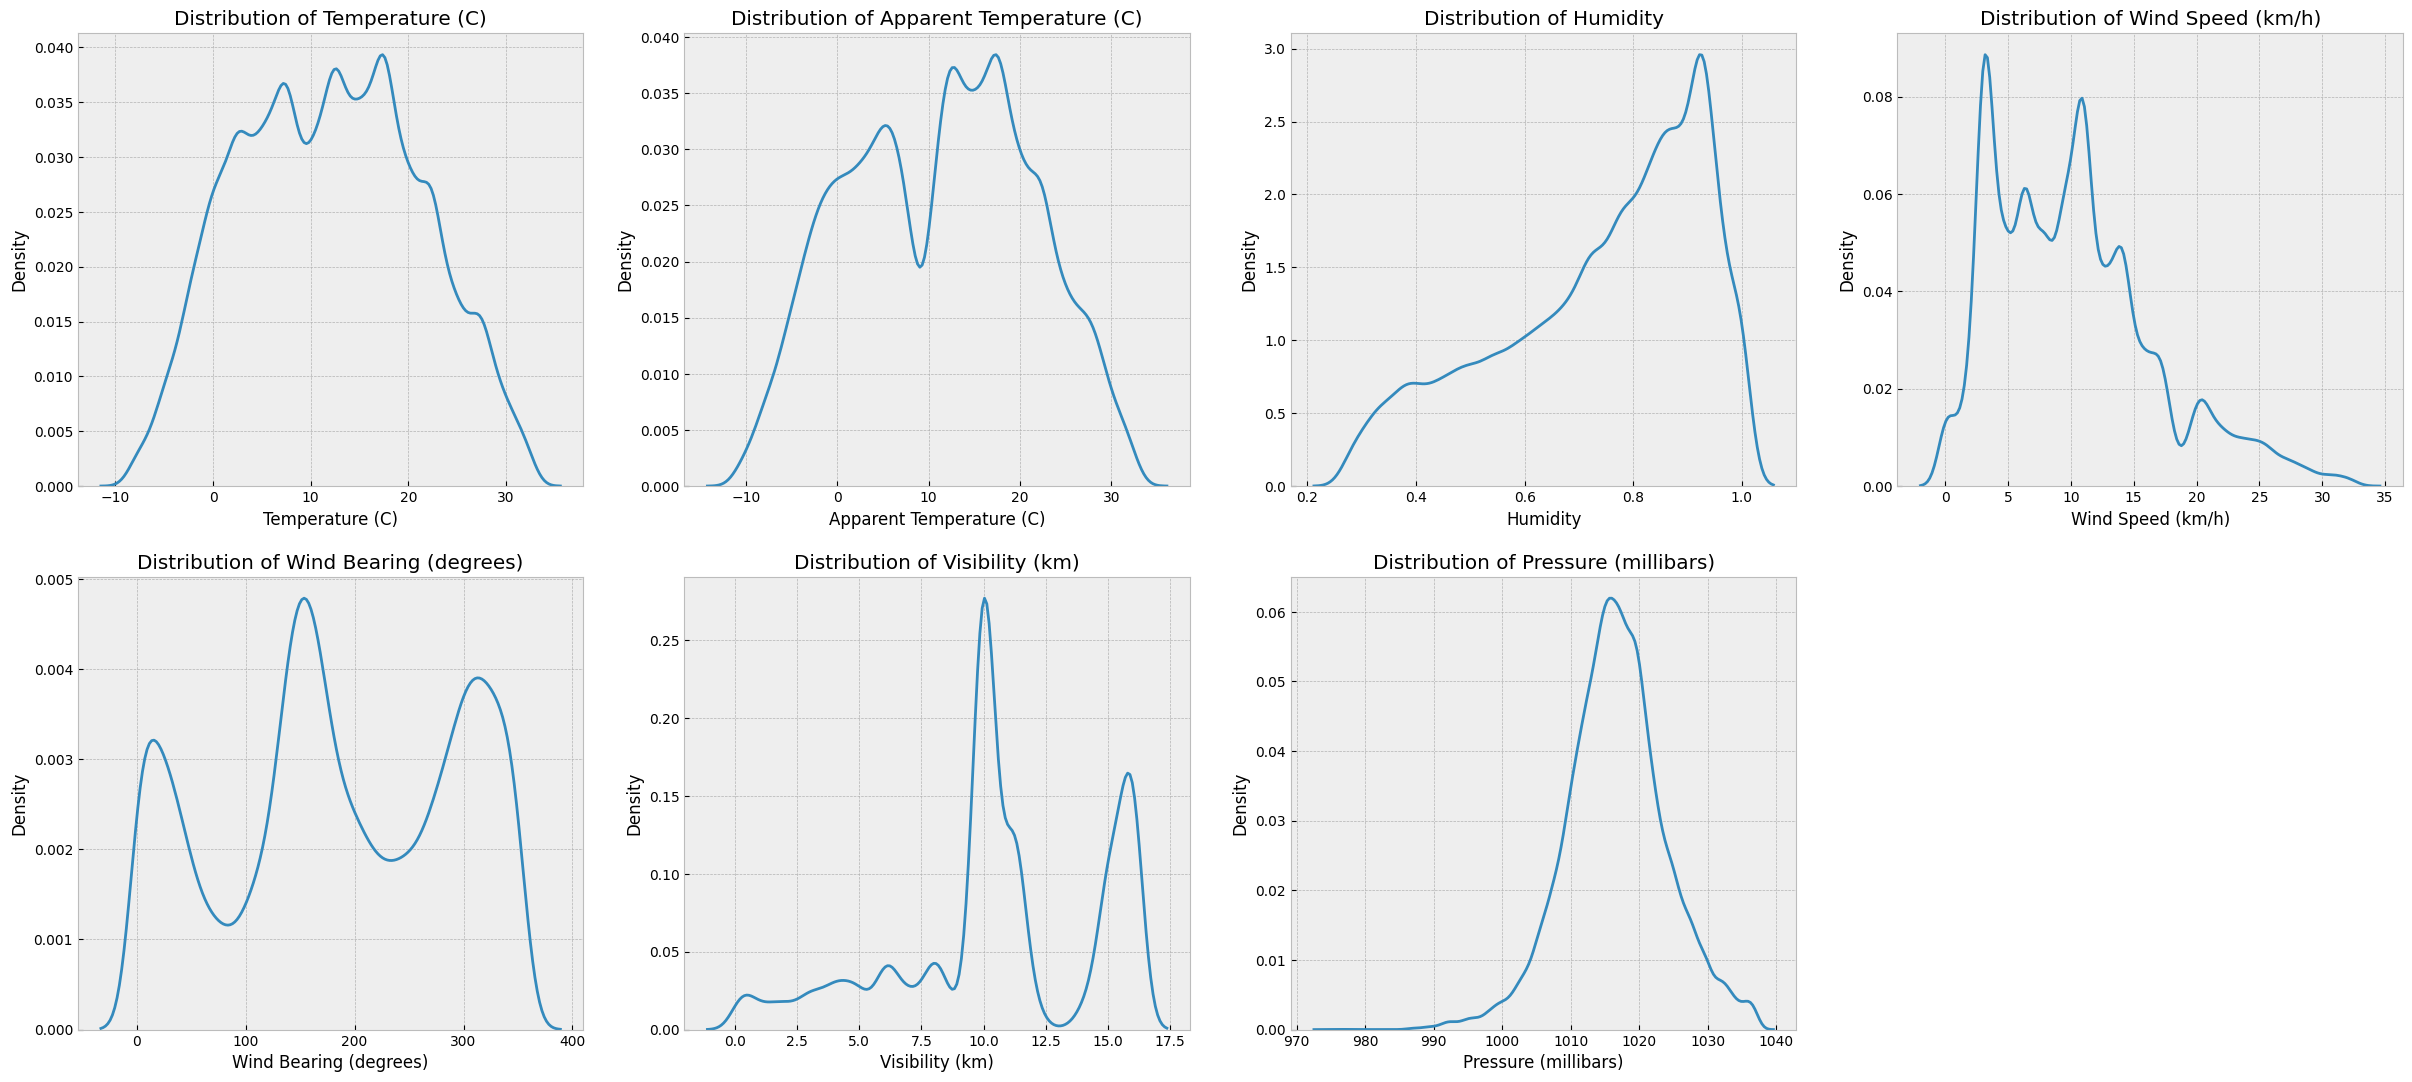

In [63]:
plt.figure(figsize=(30, 20))
plt.style.use('bmh')

num = []
i = 0
for col in df.columns:
    
    if df[col].dtype == 'object':
        continue
    i += 1
    num.append(i)
    plt.subplot(3, 4, i)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(df[col])

In [64]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2001914525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [65]:
x = df.drop(['Humidity'], axis=1)
y = df['Humidity']

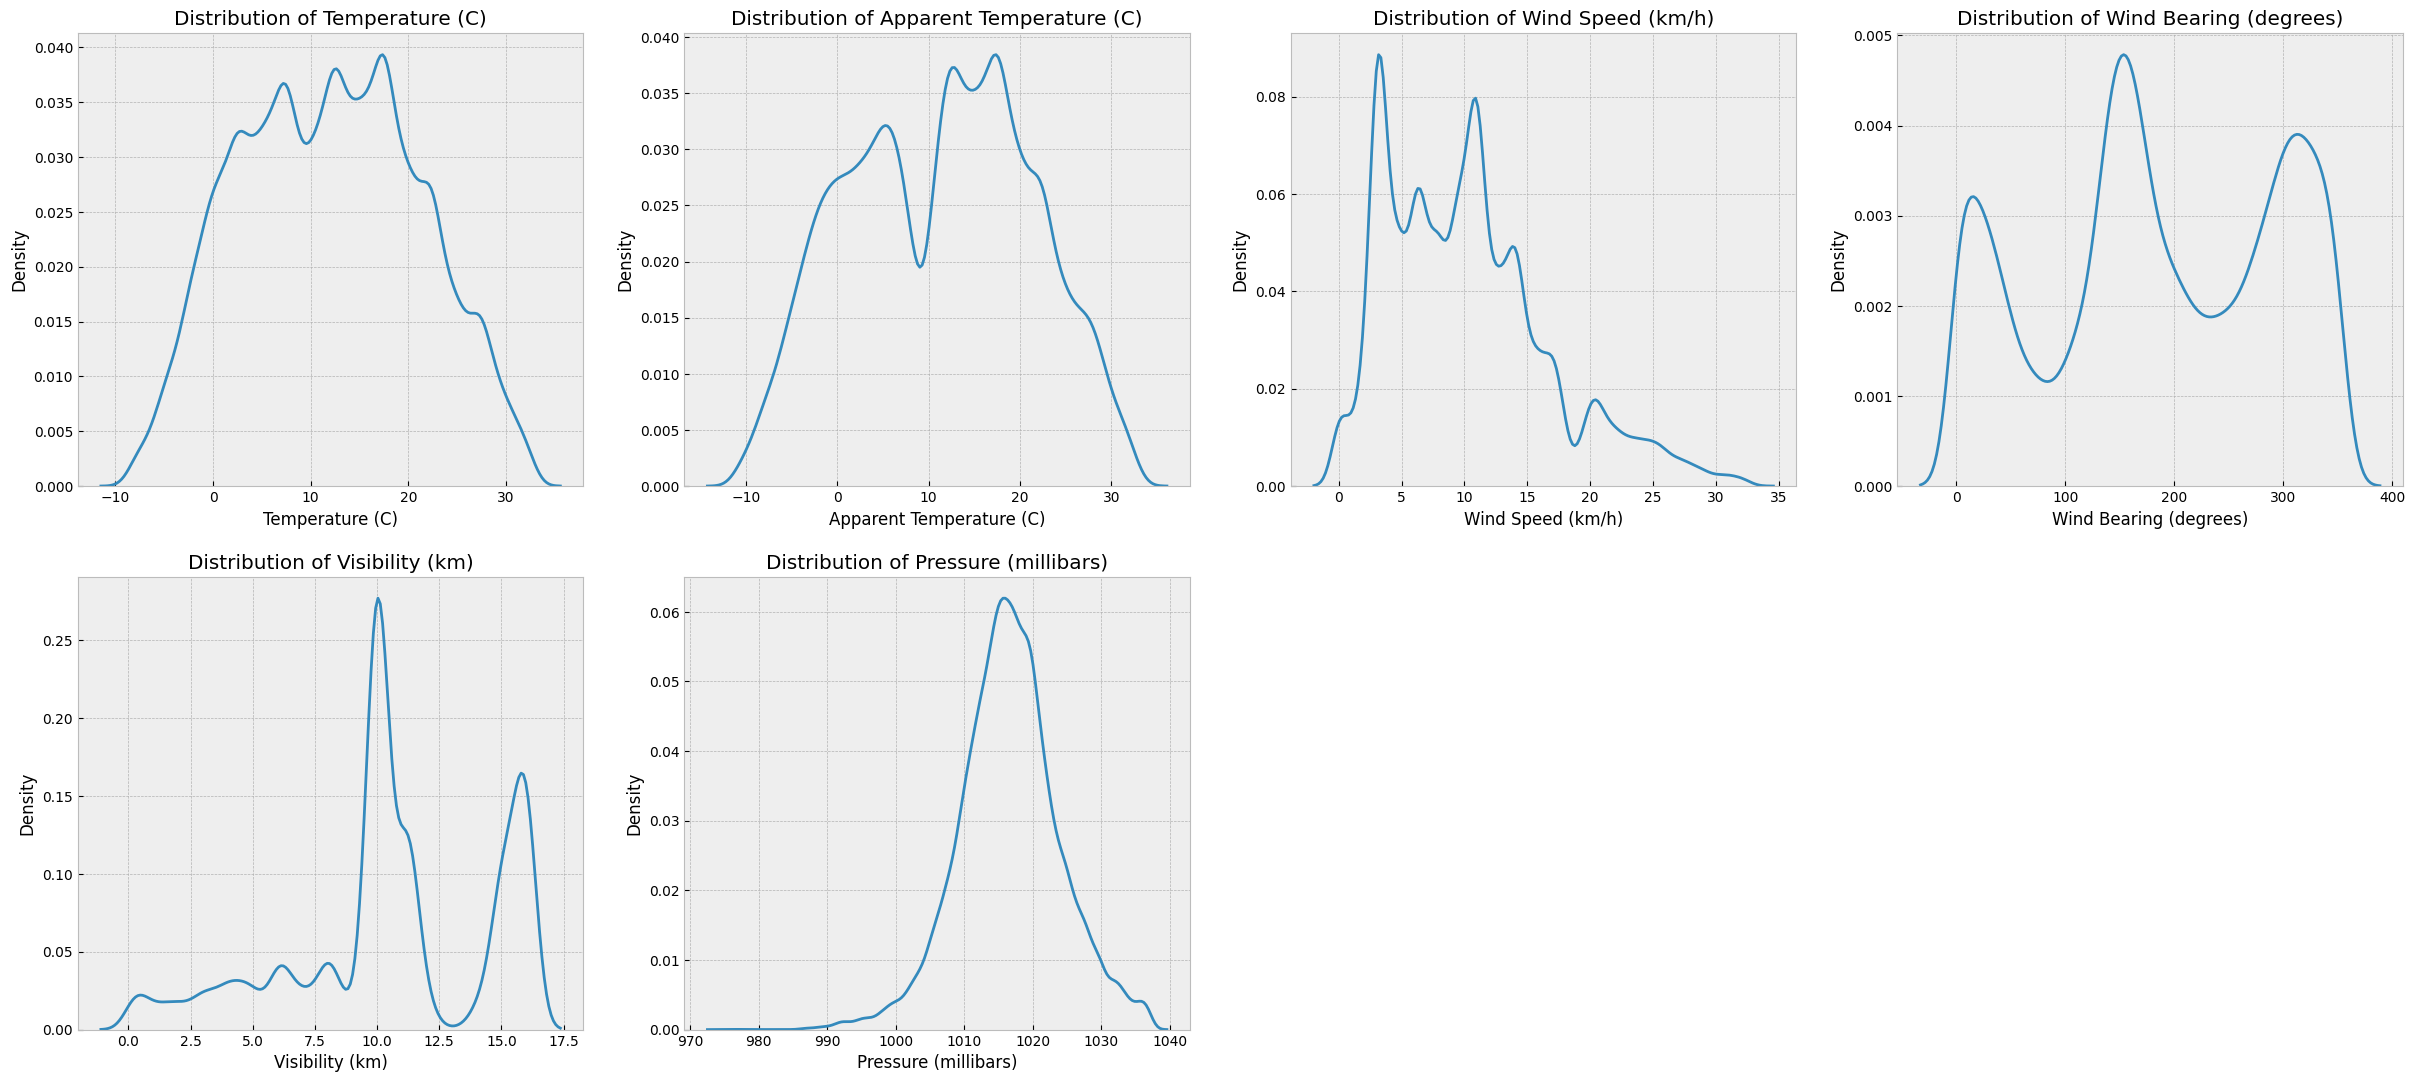

In [66]:
plt.figure(figsize=(30, 20))
plt.style.use('bmh')

num = []
i = 0
for col in x.columns:
    
    if x[col].dtype == 'object':
        continue
    i += 1
    num.append(i)
    plt.subplot(3, 4, i)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(x[col])

я бы дропнул ощущаемую температуру, но я потратил на нее столько времени.. и хочу испооьзовать ее в фиче инжиниринге

C:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


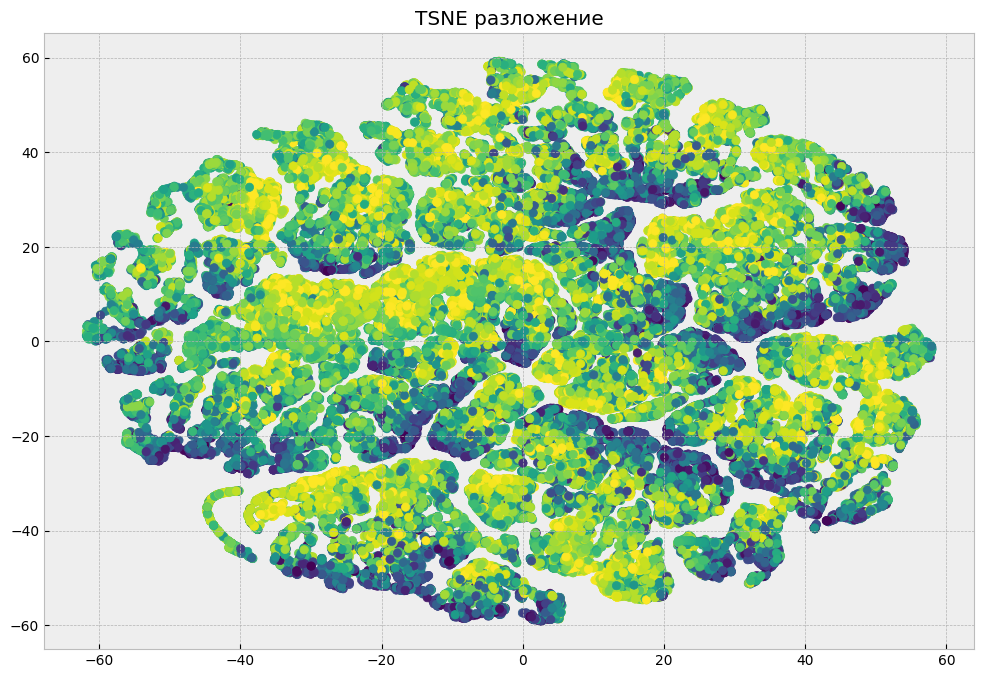

In [67]:
tsne = TSNE()
X_tsne = tsne.fit_transform(x.iloc[:, num[1:]])

plt.figure(figsize=(12,8))
plt.title('TSNE разложение')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.show()

гипотеза о компактности не выполняется, данные не разделимы, да и зачем нам..

C:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


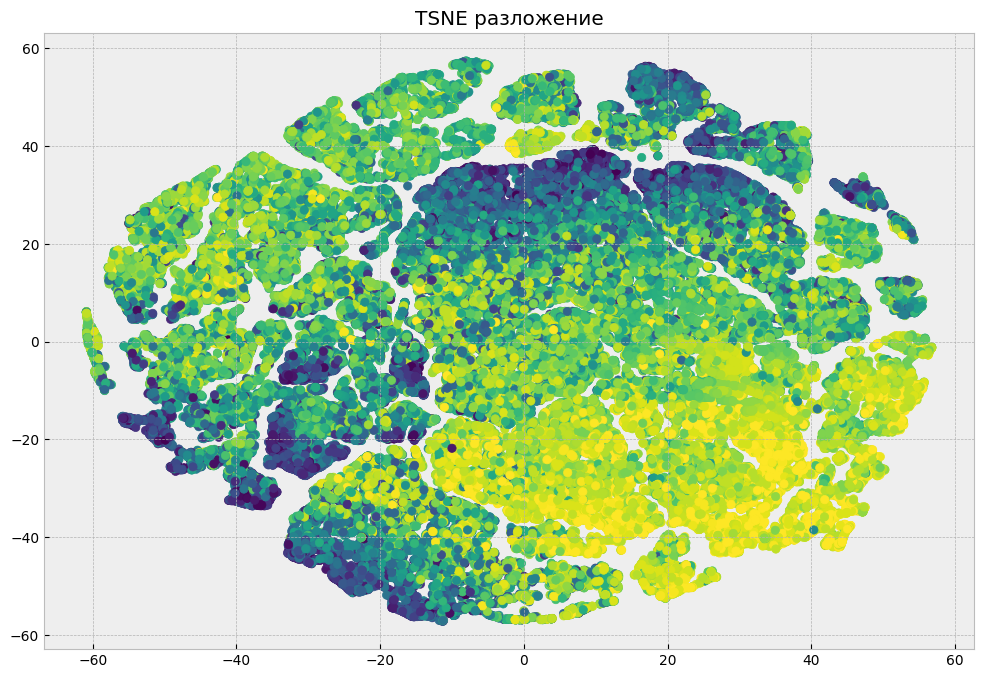

In [68]:
from sklearn.preprocessing import StandardScaler
tsne = TSNE()
X_tsne = tsne.fit_transform(StandardScaler().fit_transform(x.iloc[:, num[1:]]))

plt.figure(figsize=(12,8))
plt.title('TSNE разложение')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.show()

заменю тип осадков с помощью one-hot_encoding, так как видов осадков всего два и они одинаково часто встречаются и датасет довольно большой

In [69]:
a = pd.get_dummies(x["Precip Type"])
# x.assign(a.to_dict()["snow"])
x["snow_1"] =  a["snow"]
x["rain_1"] = a["rain"]

а краткое и полное описание заменю с помощью target encoding, так как значений много и датасет довольно большорй, данные лейблированные и в статьях пишут, что этот метод очень оченб крутой, он обычно дает модельи во!

In [70]:
import category_encoders as ce 
x["Summary"] = ce.TargetEncoder().fit_transform(x["Summary"],y)

C:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [71]:
x["Daily Summary"] = ce.TargetEncoder().fit_transform(x["Daily Summary"],y)

C:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [72]:
x["Summary"].unique()

array([0.66009329, 0.73795567, 0.8379907 , 0.92892024, 0.67855721,
       0.72700773, 0.55685714, 0.7816    , 0.88      , 0.84928547,
       0.86      , 0.62882354, 0.58750257, 0.27925926, 0.34085886,
       0.89009151, 0.74128798, 0.86891892, 0.89296296, 0.33205088,
       0.92512092])

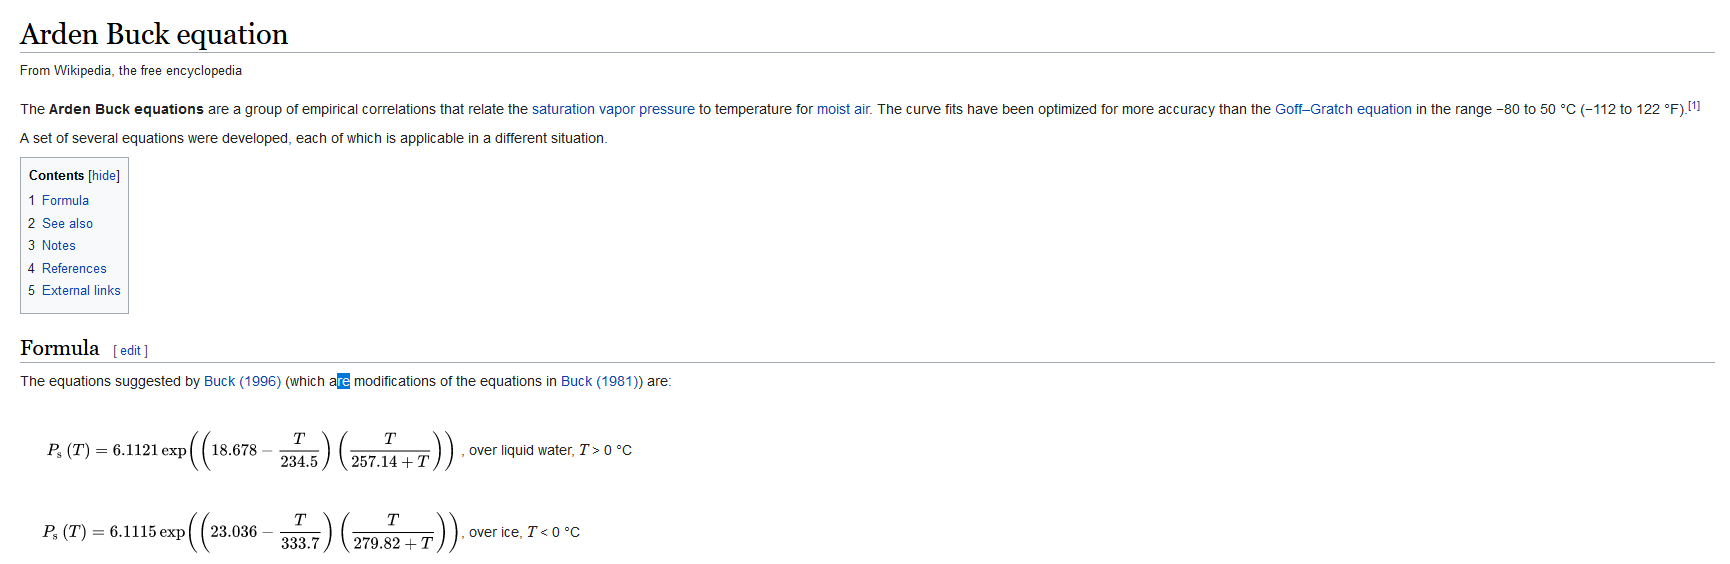

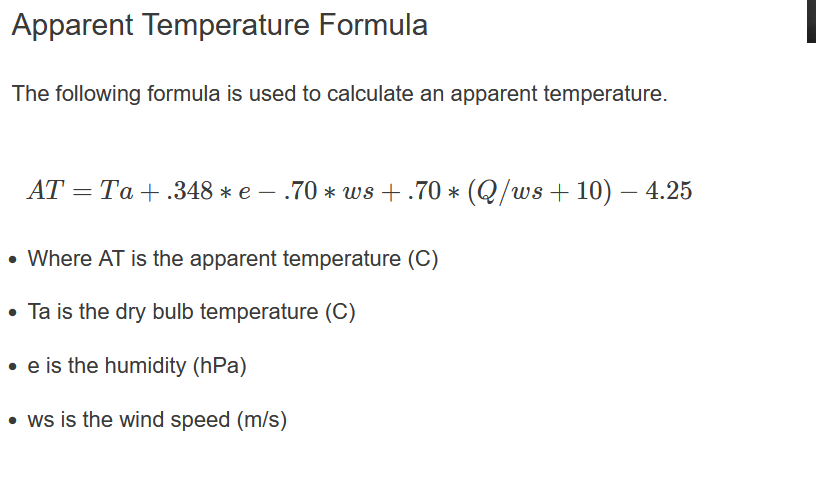

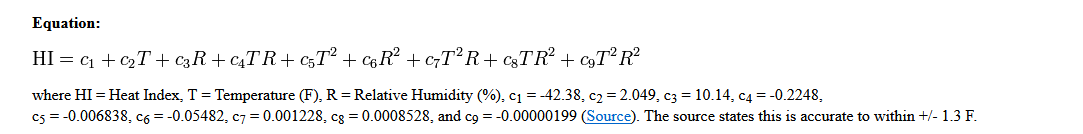

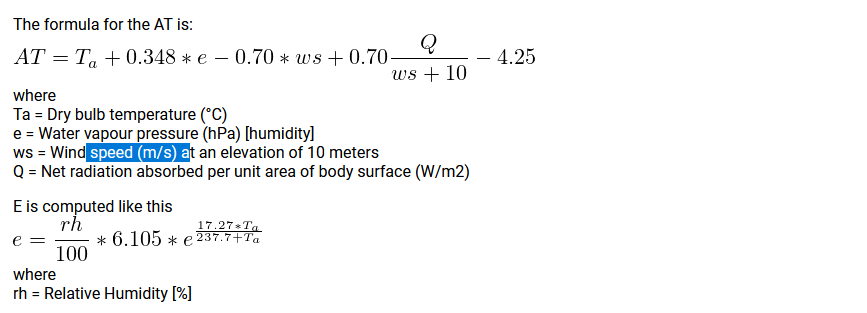

In [73]:
x["boil"] = x["Temperature (C)"] / x["Pressure (millibars)"]

In [74]:
def arden_buck(T):
    if T>0:
        return 6.1121 * np.exp((18.678 - T/(234.5)) * (T/(257.14 + T)))
    return 6.1115 * np.exp((23.036 - T/(234.5)) * (T/(257.14 + T)))

In [75]:
f = np.vectorize(arden_buck)
x["buck"] = f(x["Temperature (C)"])

In [76]:
def planet(At, T, ws):
    return (At - T + 0.7*ws - 0.7 * (2/(ws + 10)) + 4.25) / 0.348


In [77]:
f = np.vectorize(planet)
x["=planet"] = f(x["Apparent Temperature (C)"] , x["Temperature (C)"], x["Wind Speed (km/h)"])

In [ ]:
x


In [78]:
temp = pd.concat([x, y], axis = 1)
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp.corr()
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [80]:
# temp = pd.concat([x, y], axis = 1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\3814917319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\3814917319.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [81]:
def meteor(HI, T):
    c1 = -42.38
    c2 = 2.049
    c3= 10.14
    c4 = -0.2248
    c5 = -0.006838
    c6 = -0.05482
    c7 = 0.001228
    c8 = 0.0008528
    c9 = -0.00000199
    T = 1.8 * T + 32
    a = c9 * T**2  + c8 * T + c7 * T**2  + c6
    b = c4*T + c3
    c = c1 + c2*T - HI
    return (-b + np.sqrt(abs(b**2 - 4*a*c)))/(2*a)

In [82]:
f = np.vectorize(meteor)
x["meteor"] = f(x["Apparent Temperature (C)"] , x["Temperature (C)"])

In [83]:
temp = pd.concat([x, y], axis = 1)
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp.corr()
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [84]:
x["hurma"] = x["Pressure (millibars)"] / (abs(x["Temperature (C)"]) + x["Temperature (C)"]**2)

In [85]:
x["hurma_2"] = np.exp(abs(x["Temperature (C)"] + 0.00001))

In [86]:
x["hurma_3"] = abs(x['Temperature (C)']-x['Visibility (km)'])**2

In [87]:
temp = pd.concat([x, y], axis = 1)
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp.corr()
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [88]:
x["t=at"] = 1*(abs(x["Apparent Temperature (C)"] - x["Temperature (C)"]) <= 0.05)

In [89]:
x["big_wind"] = 1*(x["Wind Speed (km/h)"] >= 6.9)

In [90]:
temp = pd.concat([x, y], axis = 1)
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp.corr()
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


<AxesSubplot: xlabel='Humidity', ylabel='Density'>

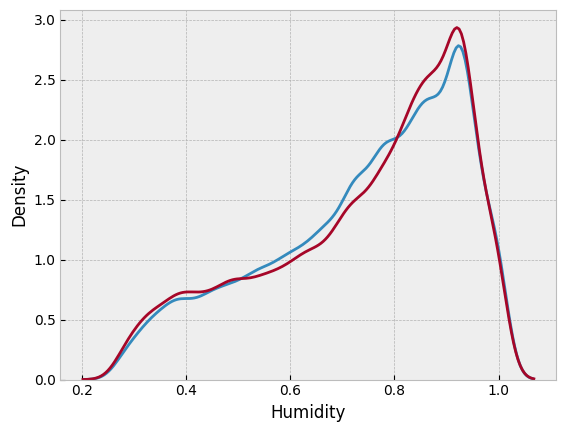

In [91]:
sns.kdeplot(df[df["Wind Bearing (degrees)"]<=180]["Humidity"])
sns.kdeplot(df[df["Wind Bearing (degrees)"]>180]["Humidity"])

In [92]:
ma = -1
k = -1
for i in range(0,360, 10):
    print("-"*50)
    print(i)
    deg = i + 90 if i + 90 < 360 else i+90-360
    f1 = min((deg, i))
    f2 = max(deg, i)
    print(df[(df["Wind Bearing (degrees)"]<=f2) & (df["Wind Bearing (degrees)"]>f1)]["Humidity"].describe())
    a = df[(df["Wind Bearing (degrees)"]<=f2) & (df["Wind Bearing (degrees)"]>f1)]["Humidity"].mean() 
    
    k = i if a>ma else k
    ma = a if a>ma else ma
    
    print("-"*50)

--------------------------------------------------
0
count    17105.000000
mean         0.723811
std          0.196324
min          0.270000
25%          0.580000
50%          0.760000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64
--------------------------------------------------
--------------------------------------------------
10
count    15097.000000
mean         0.725433
std          0.195818
min          0.270000
25%          0.580000
50%          0.760000
75%          0.900000
max          1.000000
Name: Humidity, dtype: float64
--------------------------------------------------
--------------------------------------------------
20
count    13712.000000
mean         0.728089
std          0.195485
min          0.270000
25%          0.580000
50%          0.770000
75%          0.900000
max          1.000000
Name: Humidity, dtype: float64
--------------------------------------------------
--------------------------------------------------
30
count    12

count    59430.000000
mean         0.744420
std          0.186913
min          0.270000
25%          0.620000
50%          0.790000
75%          0.900000
max          1.000000
Name: Humidity, dtype: float64
--------------------------------------------------
--------------------------------------------------
310
count    60800.000000
mean         0.743661
std          0.186858
min          0.270000
25%          0.620000
50%          0.790000
75%          0.900000
max          1.000000
Name: Humidity, dtype: float64
--------------------------------------------------
--------------------------------------------------
320
count    62470.000000
mean         0.742874
std          0.186959
min          0.270000
25%          0.620000
50%          0.790000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64
--------------------------------------------------
--------------------------------------------------
330
count    64401.000000
mean         0.743528
std          0.18

In [93]:
ma, k

(0.7503004169487901, 120)

In [103]:
x["sea_wind"] = 1*((x["Wind Bearing (degrees)"] >= 120)& (x["Wind Bearing (degrees)"] < 210))

KeyError: 'Wind Bearing (degrees)'

In [104]:
temp = pd.concat([x, y], axis = 1)
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [105]:
x["summar"] = 1*(x["Daily Summary"] >=0.8)

KeyError: 'Daily Summary'

In [97]:
temp = pd.concat([x, y], axis = 1)
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp.corr()
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [98]:
x = x.drop(["Apparent Temperature (C)",'Wind Speed (km/h)', "rain_1", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)", "Daily Summary", "Summary"], axis=1)

In [99]:
temp = pd.concat([x, y], axis = 1)
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp.corr()
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [100]:
x = x.drop(["Temperature (C)", "boil", "=planet", "meteor","hurma", "hurma_2", "t=at", "sea_wind"], axis = 1)

In [101]:
x = x.drop(["Precip Type"], axis = 1)

In [102]:
temp = pd.concat([x, y], axis = 1)
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5844\2916822463.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)




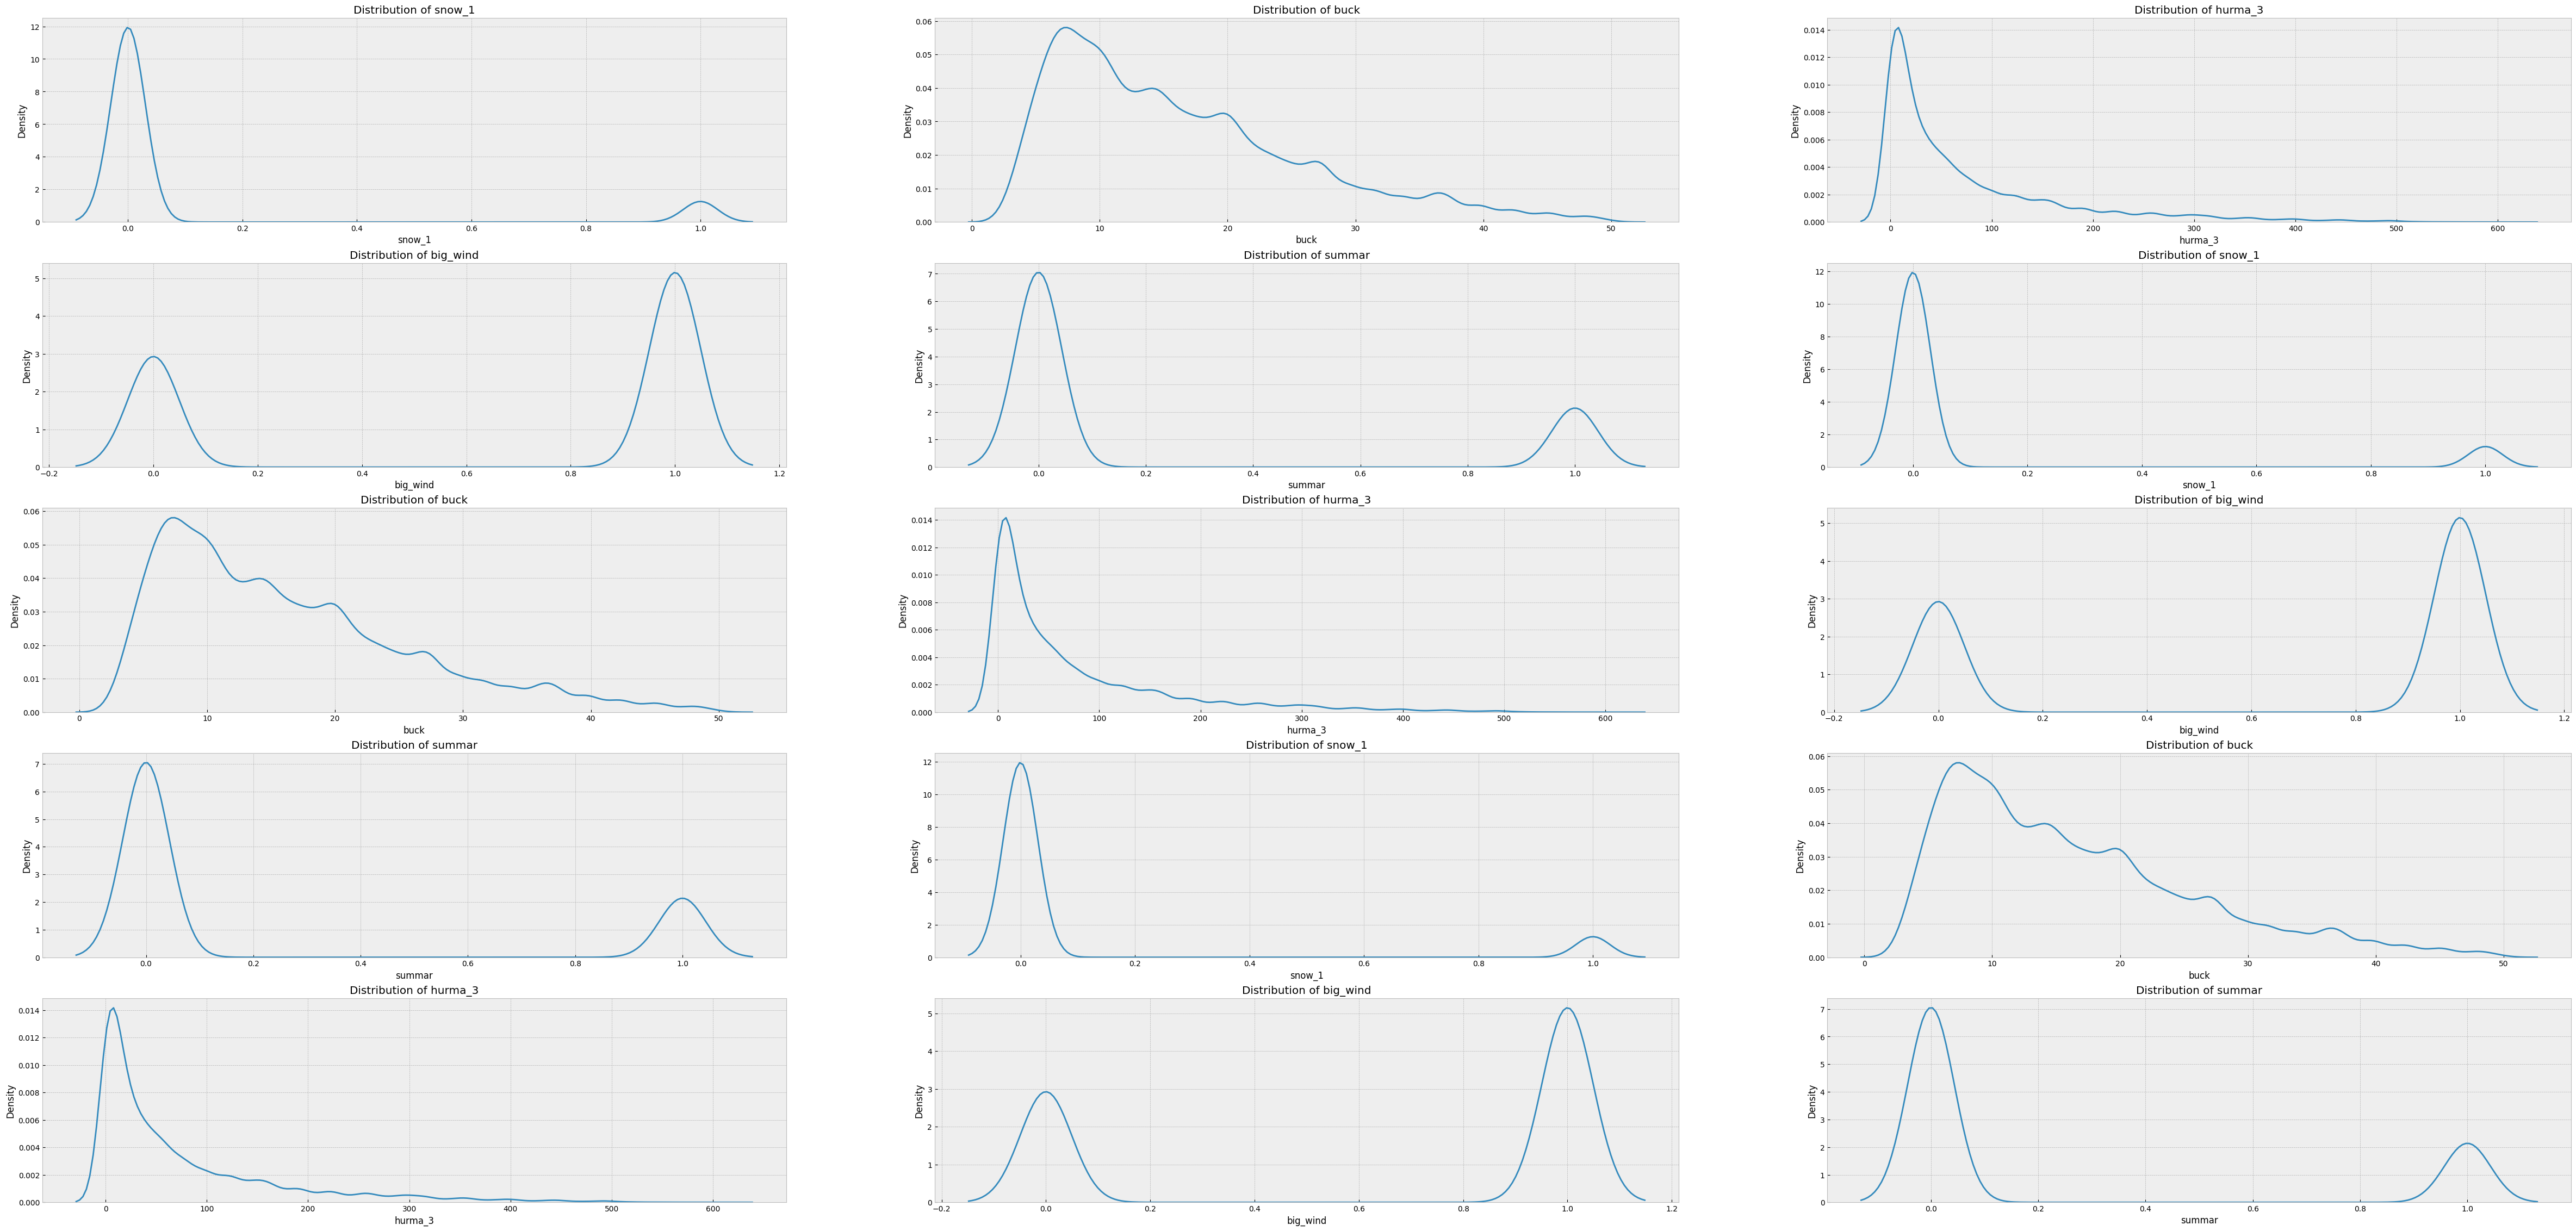

In [107]:
plt.figure(figsize=(60, 40))
plt.style.use('bmh')

num = []
i = 0
j  =0
for df_1 in [pd.DataFrame(X_train), pd.DataFrame(X_val), pd.DataFrame(X_test)]:
    j+=1
    for col in df_1:
        if x[col].dtype == 'object':
            continue
        i+=1   
        plt.subplot(7, 3, i)
        plt.title(f'Distribution of {col}')
        sns.kdeplot(x[col])
    

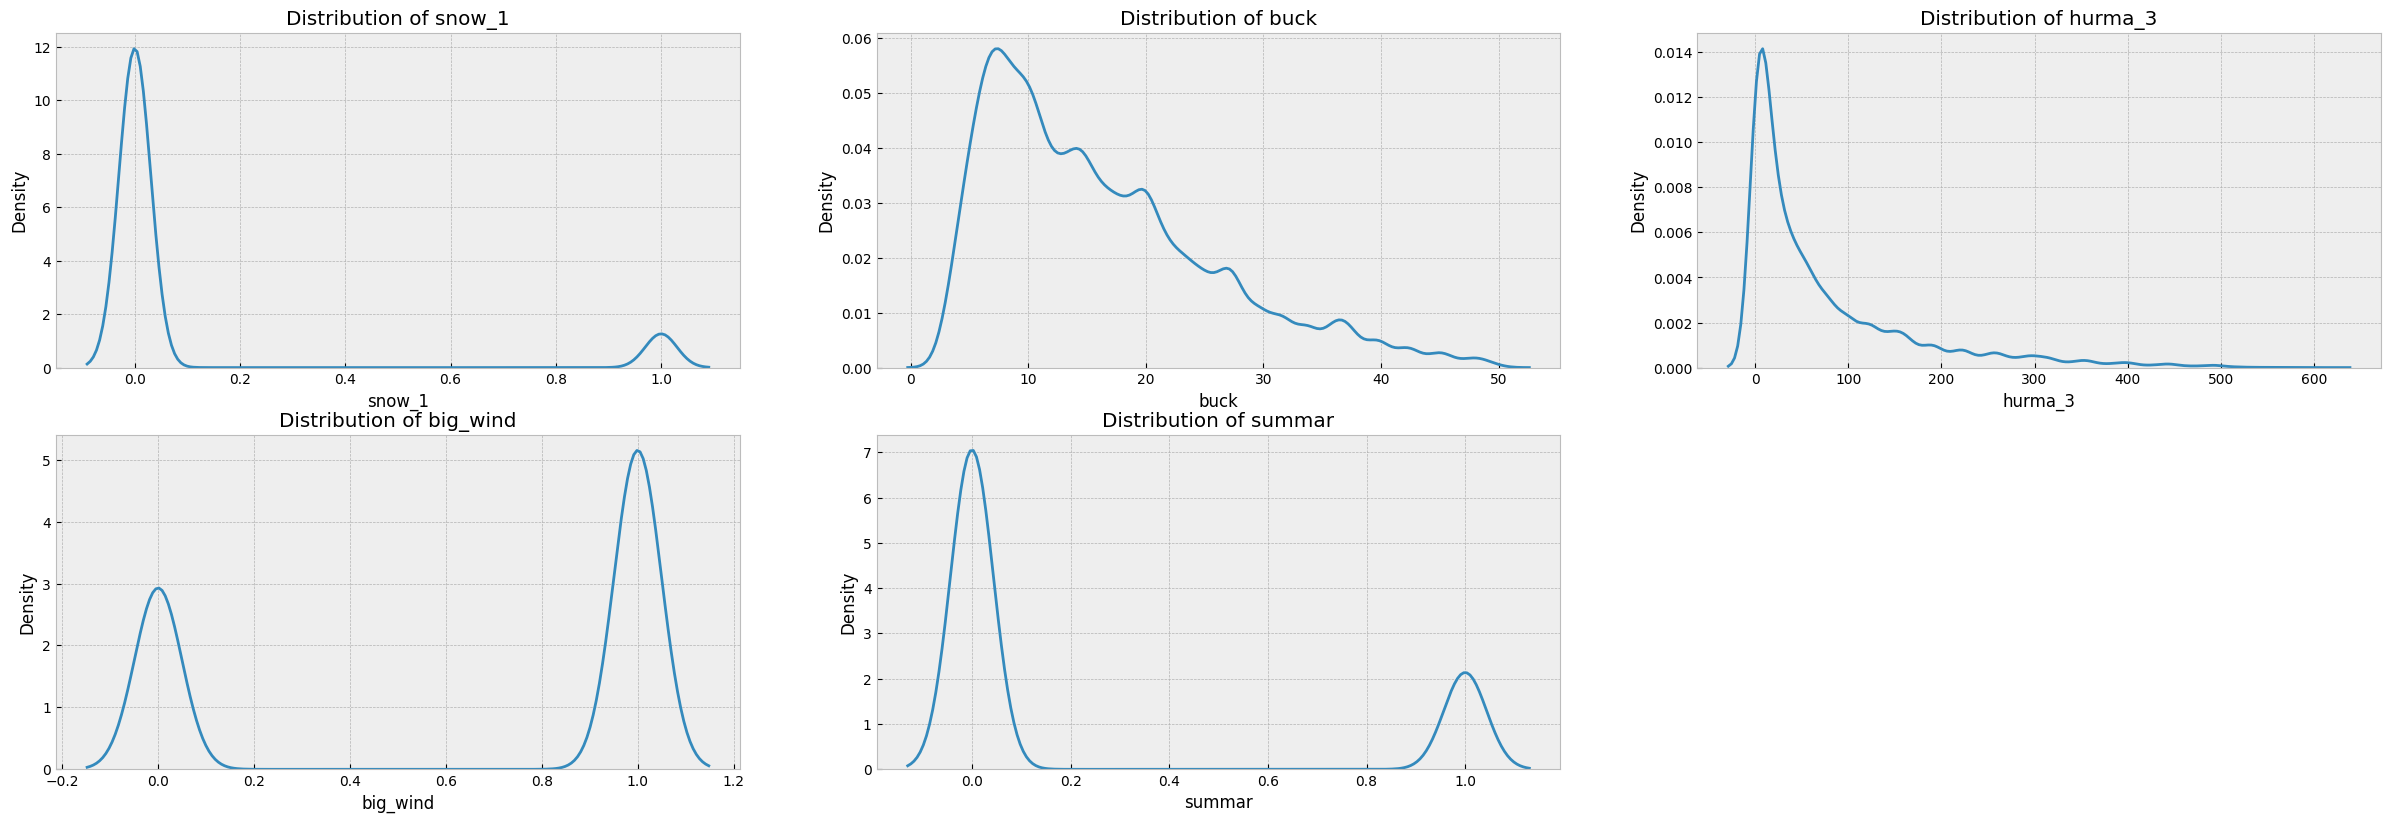

In [108]:
plt.figure(figsize=(30, 20))
plt.style.use('bmh')
i = 0
for col in pd.DataFrame(X_train):
        if x[col].dtype == 'object':
            continue
        i+=1   
        plt.subplot(4, 3, i)
        plt.title(f'Distribution of {col}')
        sns.kdeplot(x[col])
    

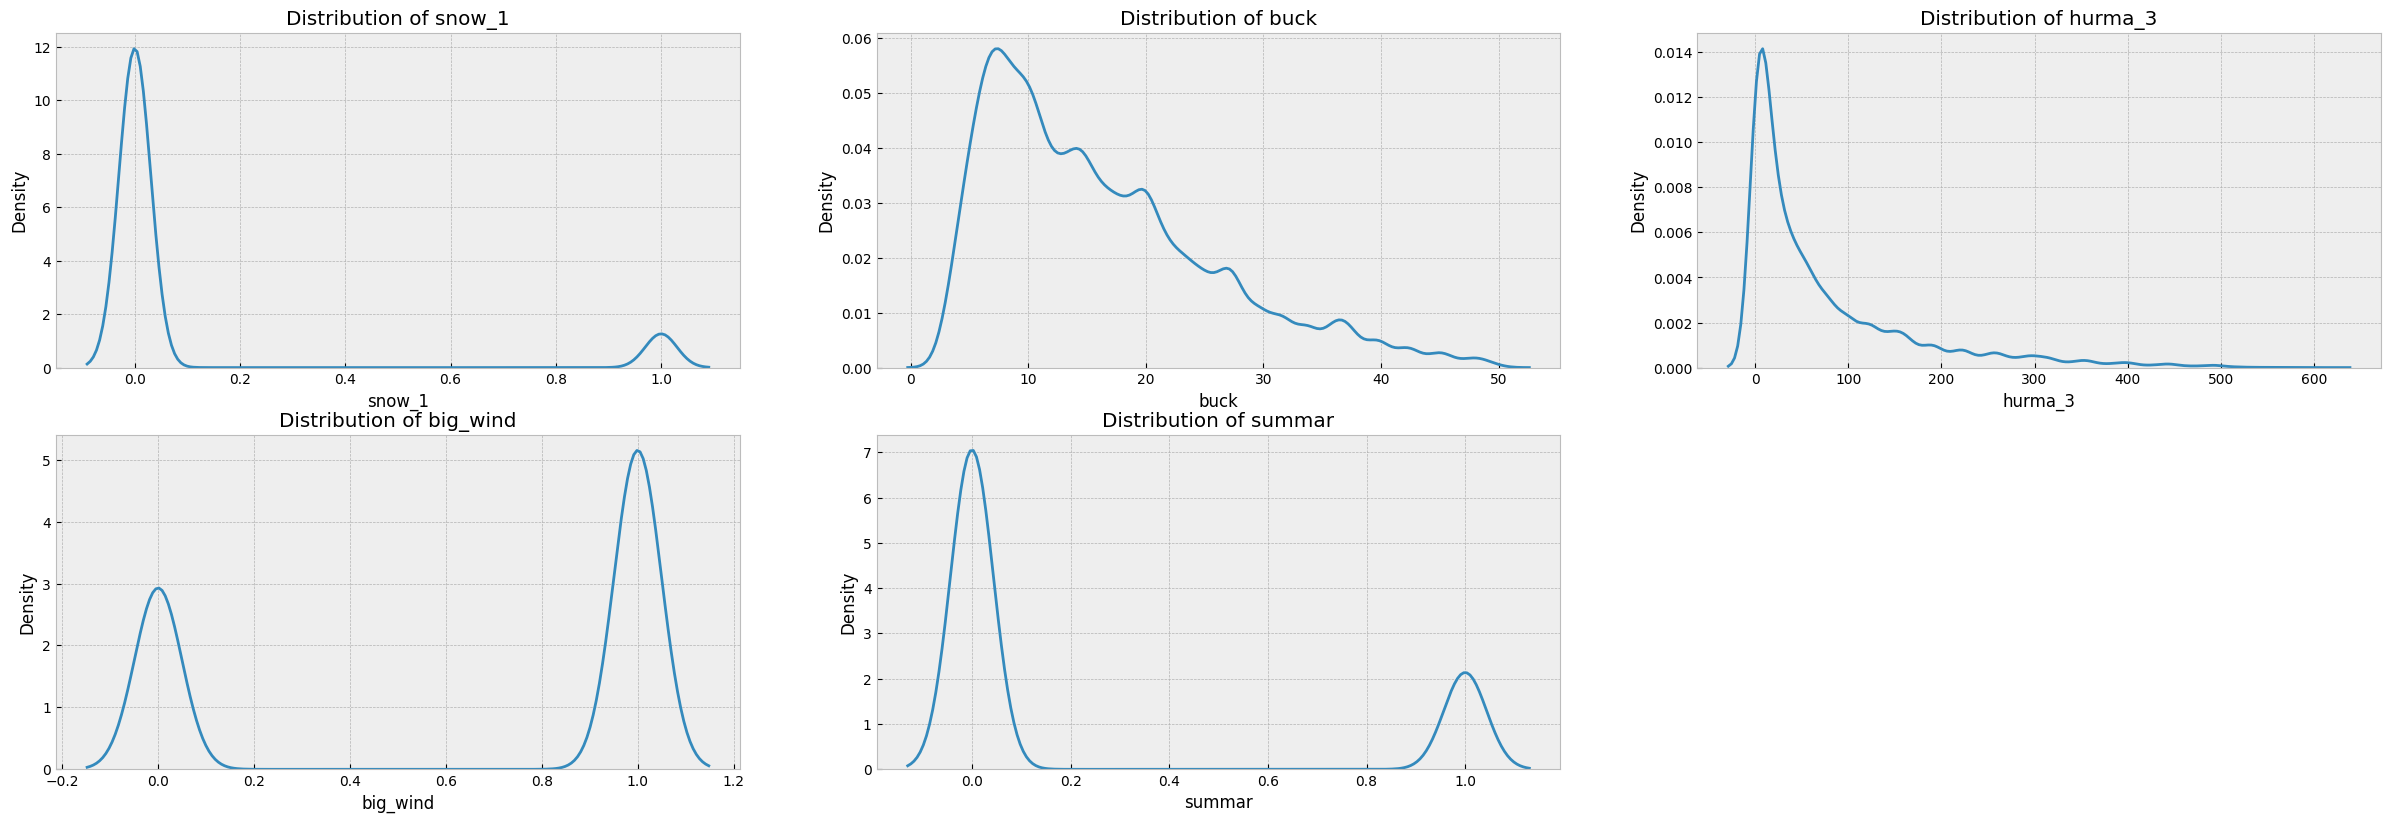

In [113]:
plt.figure(figsize=(30, 20))
plt.style.use('bmh')
i = 0
for col in pd.DataFrame(X_val):
        if x[col].dtype == 'object':
            continue
        i+=1   
        plt.subplot(4, 3, i)
        plt.title(f'Distribution of {col}')
        sns.kdeplot(x[col])
    

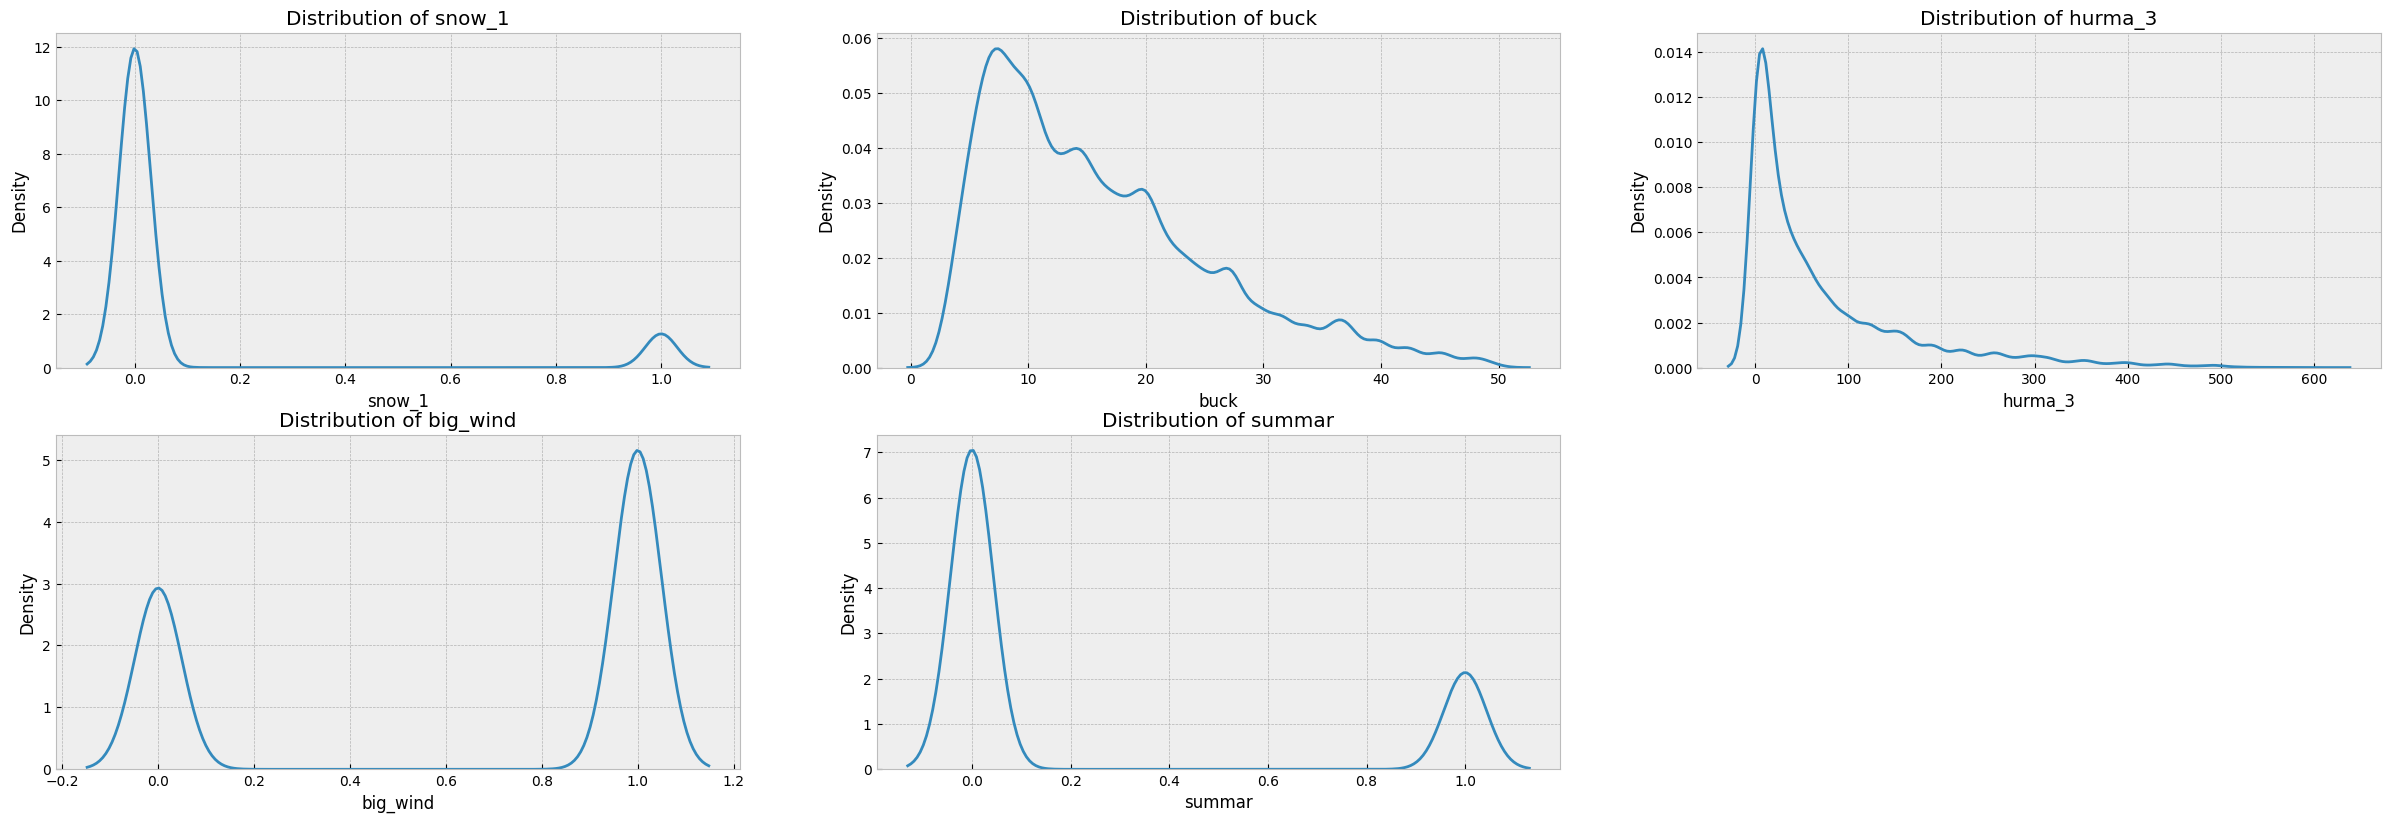

In [114]:
plt.figure(figsize=(30, 20))
plt.style.use('bmh')
i = 0
for col in pd.DataFrame(X_test):
        if x[col].dtype == 'object':
            continue
        i+=1   
        plt.subplot(4, 3, i)
        plt.title(f'Distribution of {col}')
        sns.kdeplot(x[col])
    

один в один блин!

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
X = scaler.fit_transform(x)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.coef_

array([-0.00592943, -0.01042566, -0.00024838, -0.06402049,  0.07141369])

In [116]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_val, y_val, scoring='r2', cv=4)

In [117]:
lr.score(X_test,y_test)

0.49727003635255984

In [118]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = lr.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.1695100739259782

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
regr = RandomForestRegressor()
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 5, 10],
    'max_features': [8],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [200, 500]
}
grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_val, y_val)
best_params = grid_search.best_params_


Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [120]:
best_params

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}

In [121]:
regr1 =  RandomForestRegressor(**best_params)
regr1.fit(X_train,y_train)
regr1.score(X_test,y_test)

0.5916534031272259

In [122]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test,y_test)

0.5798083928155322

In [123]:
y_pred1 = regr1.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred1)

0.15025749761136484

In [124]:
regr1.feature_importances_

array([1.55152308e-04, 7.51668541e-01, 1.05551622e-01, 4.03959711e-02,
       1.02228713e-01])


Наибольшую роль играет описание и разность температуры и видимости, описание сильно влияет, потому что мы так его задали, а видимость и температура влияют из-за каких-то физических законов

In [125]:
X_test

snow_1       buck     hurma_3  big_wind  summar
76542       0  15.915235   15.613035         1       0
20952       1   4.030269  415.646532         0       0
58638       0  14.230870    5.018596         1       0
53100       0  33.845684  260.148225         1       0
62493       0  26.424119   34.679012         1       0
...       ...        ...         ...       ...     ...
44328       0  15.178546    6.868301         0       0
92895       0  12.260336    0.077241         1       0
28750       0   6.141761   19.298742         1       1
62036       0  10.562281    0.331226         1       1
22619       0  24.525532   87.861044         0       0

[17485 rows x 5 columns]

In [126]:
from sklearn.neighbors import KNeighborsRegressor
parameters = [{'weights': ['uniform'], 'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters , cv = 4)
clf.fit(X_val, y_val)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100],
                          'weights': ['uniform']}])

In [127]:
knr1 = KNeighborsRegressor(**clf.best_params_)
knr1.fit(X_train,y_train)
knr1.score(X_test, y_test)

0.5707216629803858

In [128]:
y_pred2 = knr1.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred2)

0.15090222052399335

In [129]:
from sklearn.linear_model import Lasso
lasr = Lasso()
parameters = [{'alpha':[0.1, 0.5, 1, 2, 5]}]
cvl = GridSearchCV(lasr, parameters , cv = 4)
cvl.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': [0.1, 0.5, 1, 2, 5]}])

In [130]:
best_lasr = cvl.best_estimator_
best_lasr.score(X_test, y_test)

0.44418096017320763

In [131]:
best_lasr.coef_

array([ 0.        , -0.0100584 , -0.00034365, -0.        ,  0.        ])

Лассо зануляет все кроме давления водяного пара и разности температуры и видимости

у этих наименьшая кореляция друг с другом и наибольшая с целевым параметром

In [132]:
X = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
regr1 = RandomForestRegressor()
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 5, 10],
    'max_features': [3,5,8],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [200, 500]
}
grid_search = GridSearchCV(estimator = regr1, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_val, y_val)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10],
                         'max_features': [3, 5, 8], 'min_samples_leaf': [4, 5],
                         'min_samples_split': [8, 10],
                         'n_estimators': [200, 500]},
             verbose=2)

In [133]:
regr2 = RandomForestRegressor(**grid_search.best_params_)
regr2.fit(X_train,y_train)
regr2.score(X_test,y_test)

0.5894103273611597

In [134]:
y_pred3 = regr2.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred3)

0.1509217882311269